In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
train_2016 = pd.read_csv("../zillow/train_2016.csv")
train_2017 = pd.read_csv("../zillow/train_2017.csv")

properties_2016 = pd.read_csv("../zillow/properties_2016.csv")
properties_2017 = pd.read_csv("../zillow/properties_2017.csv")

train = [train_2016, train_2017]
train = pd.concat(train)

properties = [properties_2016, properties_2017]
properties = pd.concat(properties)

full_dataset = pd.merge(train, properties, on='parcelid', how='left')
print(full_dataset)


C:\Users\erik6\AppData\Local\Temp\ipykernel_31948\3488909126.py:4: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016 = pd.read_csv("../zillow/properties_2016.csv")
C:\Users\erik6\AppData\Local\Temp\ipykernel_31948\3488909126.py:5: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017 = pd.read_csv("../zillow/properties_2017.csv")


        parcelid  logerror transactiondate  airconditioningtypeid  \
0       11016594  0.027600      2016-01-01                    1.0   
1       11016594  0.027600      2016-01-01                    1.0   
2       14366692 -0.168400      2016-01-01                    NaN   
3       14366692 -0.168400      2016-01-01                    NaN   
4       12098116 -0.004000      2016-01-01                    1.0   
...          ...       ...             ...                    ...   
335771  17239384  0.013209      2017-09-21                    NaN   
335772  12773139  0.037129      2017-09-21                    1.0   
335773  12773139  0.037129      2017-09-21                    1.0   
335774  12826780  0.007204      2017-09-25                    NaN   
335775  12826780  0.007204      2017-09-25                    NaN   

        architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                            NaN           NaN          2.0         3.0   
1                    

In [3]:
keys = full_dataset.keys()
print("num of features ", len(keys))

for key in keys:
    if full_dataset.loc[:, key].isna().sum() > 0:
        print(key)
        percentage =full_dataset.loc[:, key].isna().sum()/len(full_dataset) * 100
        print(percentage)
        if percentage > 99:
            full_dataset.drop(key, axis=1, inplace=True)
            

print("num of features ", len(full_dataset.keys()))


num of features  60
airconditioningtypeid
67.94797722291051
architecturalstyletypeid
99.72124273325073
basementsqft
99.94460592776136
bathroomcnt
0.0521180787191461
bedroomcnt
0.0521180787191461
buildingclasstypeid
99.98123749166112
buildingqualitytypeid
36.15475793386067
calculatedbathnbr
1.060230629943772
decktypeid
99.24116077384923
finishedfloor1squarefeet
92.30111741160773
calculatedfinishedsquarefeet
0.5039073668159725
finishedsquarefeet12
4.9497283903554745
finishedsquarefeet13
99.95532736109787
finishedsquarefeet15
96.07655103402269
finishedsquarefeet50
92.30111741160773
finishedsquarefeet6
99.52230058133993
fips
0.0521180787191461
fireplacecnt
89.33336510054322
fullbathcnt
1.060230629943772
garagecarcnt
66.94462975316878
garagetotalsqft
66.94462975316878
hashottuborspa
97.68268131135042
heatingorsystemtypeid
37.0121747831888
latitude
0.0521180787191461
longitude
0.0521180787191461
lotsizesquarefeet
10.995723339369103
poolcnt
79.70313542361575
poolsizesum
98.90522252930525
pool

In [4]:
keys = full_dataset.keys()

for key in keys:
    if full_dataset.loc[:, key].isna().sum() > 0:
        percentage =full_dataset.loc[:, key].isna().sum()/len(full_dataset) * 100
        if percentage > 50 or 'calculated' in key:
            print(key, percentage)

airconditioningtypeid 67.94797722291051
calculatedbathnbr 1.060230629943772
finishedfloor1squarefeet 92.30111741160773
calculatedfinishedsquarefeet 0.5039073668159725
finishedsquarefeet15 96.07655103402269
finishedsquarefeet50 92.30111741160773
fireplacecnt 89.33336510054322
garagecarcnt 66.94462975316878
garagetotalsqft 66.94462975316878
hashottuborspa 97.68268131135042
poolcnt 79.70313542361575
poolsizesum 98.90522252930525
pooltypeid2 98.64731249404365
pooltypeid7 81.0698203564281
regionidneighborhood 60.11597017058992
threequarterbathnbr 86.82008243590965
yardbuildingsqft17 96.99740303059183
numberofstories 77.24554464881349
taxdelinquencyflag 97.2106404269513
taxdelinquencyyear 97.2106404269513


In [5]:
full_dataset.drop('finishedsquarefeet15', axis=1, inplace=True)
full_dataset.drop('finishedfloor1squarefeet', axis=1, inplace=True)
full_dataset.drop('finishedsquarefeet50', axis=1, inplace=True)




In [6]:
keys = full_dataset.keys()

for key in keys:
    if full_dataset.loc[:, key].isna().sum() > 0:
        percentage =full_dataset.loc[:, key].isna().sum()/len(full_dataset) * 100
        print(key, percentage)

airconditioningtypeid 67.94797722291051
bathroomcnt 0.0521180787191461
bedroomcnt 0.0521180787191461
buildingqualitytypeid 36.15475793386067
calculatedbathnbr 1.060230629943772
calculatedfinishedsquarefeet 0.5039073668159725
finishedsquarefeet12 4.9497283903554745
fips 0.0521180787191461
fireplacecnt 89.33336510054322
fullbathcnt 1.060230629943772
garagecarcnt 66.94462975316878
garagetotalsqft 66.94462975316878
hashottuborspa 97.68268131135042
heatingorsystemtypeid 37.0121747831888
latitude 0.0521180787191461
longitude 0.0521180787191461
lotsizesquarefeet 10.995723339369103
poolcnt 79.70313542361575
poolsizesum 98.90522252930525
pooltypeid2 98.64731249404365
pooltypeid7 81.0698203564281
propertycountylandusecode 0.05241589631182693
propertylandusetypeid 0.0521180787191461
propertyzoningdesc 35.22526922710378
rawcensustractandblock 0.0521180787191461
regionidcity 1.993888782998189
regionidcounty 0.0521180787191461
regionidneighborhood 60.11597017058992
regionidzip 0.09470599447250548
ro

In [7]:
print(full_dataset.keys())

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'censustractandblock'],
      dtype='object')


In [8]:
full_dataset['fireplacecnt'] = full_dataset['fireplacecnt'].fillna(0)

In [9]:
full_dataset['poolcnt'] = np.where(full_dataset['poolcnt'].isna(), 0, full_dataset['poolcnt'])  

In [10]:
print(full_dataset['poolcnt'])
print(full_dataset['poolcnt'].unique())

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
335771    0.0
335772    0.0
335773    0.0
335774    0.0
335775    0.0
Name: poolcnt, Length: 335776, dtype: float64
[0. 1.]


In [11]:
full_dataset.drop('pooltypeid7', axis=1, inplace=True)
full_dataset.drop('pooltypeid2', axis=1, inplace=True)
full_dataset.drop('taxdelinquencyflag', axis=1, inplace=True)
full_dataset.drop('taxdelinquencyyear', axis=1, inplace=True)

In [12]:
print(full_dataset.keys())
print(full_dataset.shape)

Index(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'],
      dtype='object')
(335776, 42)


In [13]:
keys = full_dataset.keys()

for key in keys:
    if full_dataset.loc[:, key].isna().sum() > 0:
        percentage =full_dataset.loc[:, key].isna().sum()/len(full_dataset) * 100
        if percentage > 20:
            full_dataset.drop(key, axis=1, inplace=True)

In [14]:
print(full_dataset)

        parcelid  logerror transactiondate  bathroomcnt  bedroomcnt  \
0       11016594  0.027600      2016-01-01          2.0         3.0   
1       11016594  0.027600      2016-01-01          2.0         3.0   
2       14366692 -0.168400      2016-01-01          3.5         4.0   
3       14366692 -0.168400      2016-01-01          3.5         4.0   
4       12098116 -0.004000      2016-01-01          3.0         2.0   
...          ...       ...             ...          ...         ...   
335771  17239384  0.013209      2017-09-21          2.0         4.0   
335772  12773139  0.037129      2017-09-21          1.0         3.0   
335773  12773139  0.037129      2017-09-21          1.0         3.0   
335774  12826780  0.007204      2017-09-25          2.0         3.0   
335775  12826780  0.007204      2017-09-25          2.0         3.0   

        calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                     2.0                        1684.0           

In [15]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335776 entries, 0 to 335775
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      335776 non-null  int64  
 1   logerror                      335776 non-null  float64
 2   transactiondate               335776 non-null  object 
 3   bathroomcnt                   335601 non-null  float64
 4   bedroomcnt                    335601 non-null  float64
 5   calculatedbathnbr             332216 non-null  float64
 6   calculatedfinishedsquarefeet  334084 non-null  float64
 7   finishedsquarefeet12          319156 non-null  float64
 8   fips                          335601 non-null  float64
 9   fireplacecnt                  335776 non-null  float64
 10  fullbathcnt                   332216 non-null  float64
 11  latitude                      335601 non-null  float64
 12  longitude                     335601 non-nul

In [16]:
# drop objects
full_dataset.drop("transactiondate", axis=1, inplace=True)
full_dataset.drop("propertycountylandusecode", axis=1, inplace=True)

In [17]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335776 entries, 0 to 335775
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      335776 non-null  int64  
 1   logerror                      335776 non-null  float64
 2   bathroomcnt                   335601 non-null  float64
 3   bedroomcnt                    335601 non-null  float64
 4   calculatedbathnbr             332216 non-null  float64
 5   calculatedfinishedsquarefeet  334084 non-null  float64
 6   finishedsquarefeet12          319156 non-null  float64
 7   fips                          335601 non-null  float64
 8   fireplacecnt                  335776 non-null  float64
 9   fullbathcnt                   332216 non-null  float64
 10  latitude                      335601 non-null  float64
 11  longitude                     335601 non-null  float64
 12  lotsizesquarefeet             298855 non-nul

In [18]:
# drop rows with na values
features = full_dataset.dropna(inplace=False).drop(columns = ['logerror'], inplace=False)
labels = pd.DataFrame(full_dataset.dropna(inplace=False)['logerror'])

print(features)
print(labels)

features.info()

        parcelid  bathroomcnt  bedroomcnt  calculatedbathnbr  \
0       11016594          2.0         3.0                2.0   
1       11016594          2.0         3.0                2.0   
4       12098116          3.0         2.0                3.0   
5       12098116          3.0         2.0                3.0   
6       12643413          2.0         2.0                2.0   
...          ...          ...         ...                ...   
335771  17239384          2.0         4.0                2.0   
335772  12773139          1.0         3.0                1.0   
335773  12773139          1.0         3.0                1.0   
335774  12826780          2.0         3.0                2.0   
335775  12826780          2.0         3.0                2.0   

        calculatedfinishedsquarefeet  finishedsquarefeet12    fips  \
0                             1684.0                1684.0  6037.0   
1                             1684.0                1684.0  6037.0   
4                    

In [19]:
from sklearn.model_selection import train_test_split

train_feat, test_feat, train_labels, test_labels = train_test_split(features, labels, train_size=0.49)

In [20]:
# model attempt 1 
# use sklearn mlpregressor
# using this website as a guide https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression
# and this one https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_feat)
train_feat = scaler.transform(train_feat)
test_feat = scaler.transform(test_feat)

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

nn = MLPRegressor()

# was throwing a warning due to passing in column vector
train_labels = np.ravel(train_labels)
nn.fit(train_feat, train_labels)


MLPRegressor()

In [22]:
predictions = nn.predict(test_feat)

mae = mean_absolute_error(test_labels, predictions)
print("Mean Absolute Error for MLP Regressor with no hyperparameter tuning: %2.6f" % (mae))

Mean Absolute Error for MLP Regressor with no hyperparameter tuning: 0.069750


In [23]:
# time to tune hyper parameters

In [24]:
print(nn.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [33]:
# referencing https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {
    'hidden_layer_sizes' : (100, 200, 300),
    'alpha' : (0.001, 0.01, 0.1),
    'max_iter' : (100, 250, 500)
}

grid_search = GridSearchCV(nn, parameters, n_jobs=-1)
grid_search.fit(train_feat, train_labels)



GridSearchCV(estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'alpha': (0.001, 0.01, 0.1),
                         'hidden_layer_sizes': (100, 200, 300),
                         'max_iter': (100, 250, 500)})

In [34]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)
# print(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,45.322401,38.403643,0.236200,0.342140,0.001,100,100,"{'alpha': 0.001, 'hidden_layer_sizes': 100, 'm...",-0.010566,0.001558,0.003445,-0.015070,-0.023287,-0.008784,0.010095,17
1,19.498202,7.940284,0.072400,0.012093,0.001,100,250,"{'alpha': 0.001, 'hidden_layer_sizes': 100, 'm...",-0.006361,0.001039,-0.026545,-0.036203,-0.055246,-0.024663,0.020335,25
2,17.197805,6.183495,0.082396,0.029479,0.001,100,500,"{'alpha': 0.001, 'hidden_layer_sizes': 100, 'm...",-0.031060,-0.062274,-0.031852,-0.027090,-0.029807,-0.036417,0.013029,27
3,35.146400,21.667555,0.156401,0.051309,0.001,200,100,"{'alpha': 0.001, 'hidden_layer_sizes': 200, 'm...",-0.081316,0.003016,0.001464,-0.024010,-0.038773,-0.027924,0.030999,26
4,34.908200,18.032175,0.138599,0.024360,0.001,200,250,"{'alpha': 0.001, 'hidden_layer_sizes': 200, 'm...",-0.015697,-0.001138,-0.017338,0.005721,-0.027052,-0.011101,0.011804,20
5,56.380999,25.766333,0.324602,0.298090,0.001,200,500,"{'alpha': 0.001, 'hidden_layer_sizes': 200, 'm...",0.005550,0.003328,0.003496,0.001846,-0.111597,-0.019476,0.046076,23
6,59.844000,34.432194,0.328400,0.167294,0.001,300,100,"{'alpha': 0.001, 'hidden_layer_sizes': 300, 'm...",-0.014695,0.003173,0.004671,0.001725,-0.041343,-0.009294,0.017482,18
7,61.642600,29.272361,0.274200,0.148302,0.001,300,250,"{'alpha': 0.001, 'hidden_layer_sizes': 300, 'm...",-0.017545,0.002252,-0.059817,0.004364,0.008328,-0.012484,0.025299,22
8,56.541201,20.042477,0.181798,0.015079,0.001,300,500,"{'alpha': 0.001, 'hidden_layer_sizes': 300, 'm...",-0.009673,0.006043,0.006382,0.006424,-0.005466,0.000742,0.006917,12
9,82.604997,79.402052,0.494400,0.534292,0.01,100,100,"{'alpha': 0.01, 'hidden_layer_sizes': 100, 'ma...",0.003368,0.004547,-0.023593,-0.018709,0.007237,-0.005430,0.012989,14


In [35]:
new_predictions = grid_search.predict(test_feat)
new_mae = mean_absolute_error(test_labels, new_predictions)

print("Mean Absolute Error for MLP Regressor with hyperparameter tuning: %2.6f" % (new_mae))
print("Hypertuned parameters: ", grid_search.best_params_)


Mean Absolute Error for MLP Regressor with hyperparameter tuning: 0.067984
Hypertuned parameters:  {'alpha': 0.01, 'hidden_layer_sizes': 300, 'max_iter': 100}


In [36]:
# attempt 2 with different model

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(train_feat, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
predictions = xgb.predict(test_feat)

mae = mean_absolute_error(test_labels, predictions)
print("Mean Absolute Error for XGBoost Regressor with no hyperparameter tuning: %2.6f" % (mae))


Mean Absolute Error for XGBoost Regressor with no hyperparameter tuning: 0.068476


In [39]:
# time to tune hyper parameters

parameters = {
    'n_estimators' : (5, 10, 50),
    'max_depth' : (3, 4),
    'learning_rate' : (0.1, 0.01, 0.001),
    'reg_lambda' : (1, 2),
    'min_child_weight' : (1, 2),
    'gamma' : (0, 5)
}

grid_search2 = GridSearchCV(xgb, parameters, n_jobs=-1)
grid_search2.fit(train_feat, train_labels)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [40]:
new_predictions = grid_search2.predict(test_feat)
new_mae = mean_absolute_error(test_labels, new_predictions)

print("Mean Absolute Error for XGBoost Regressor with hyperparameter tuning: %2.6f" % (new_mae))
print("Hypertuned parameters: ", grid_search2.best_params_)

Mean Absolute Error for XGBoost Regressor with hyperparameter tuning: 0.068167
Hypertuned parameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'reg_lambda': 1}


In [42]:
# choosing MLP Regressor as model to submit
import pickle

with open("zillow.model", "wb") as f:
    pickle.dump(grid_search, f)


In [43]:
print(new_predictions)

[0.01383117 0.02415776 0.0179121  ... 0.02238787 0.01235439 0.03007626]


In [45]:
for i in new_predictions:
    print(i)

0.013831169
0.024157759
0.017912095
0.023016449
0.001965922
0.009310973
0.022713779
0.015150585
0.027909566
0.003929169
0.014961054
0.01783906
0.02435715
0.011035625
0.0061215004
0.011469025
0.008632815
0.01181413
0.02025563
0.021163918
0.028562043
0.018120574
0.02284893
0.016083635
-0.0023089957
0.022308439
0.012736752
0.018713323
0.012760249
0.026809176
0.01783906
0.00035775406
0.0077102706
0.030679975
-0.023225654
0.014581112
0.01214244
0.014505547
0.017085321
0.020823414
0.012218023
0.019371456
0.012949526
0.0069179586
0.0032086482
0.027480202
0.02835413
0.008185451
0.00023878356
0.015409048
0.034937546
0.0020071203
0.02649563
0.017934201
0.043622952
-0.004903989
0.00930206
0.02046483
0.015954208
0.015982095
0.02174054
0.0066652433
0.0043380857
0.035704974
0.005461796
0.025538284
0.0130416835
0.03098388
0.005349951
0.021771722
0.009357904
0.0071092425
0.02648979
0.01214095
0.02717885
0.012174567
0.032556184
0.030431926
0.019188948
0.014336123
0.011622009
0.017216574
0.011718981
0.0

0.028266076
0.005874606
0.020734807
0.00939042
0.028480798
-0.0026343921
0.029504238
0.0026701558
0.013306793
0.008647139
-0.0051931655
0.004834908
0.017901996
0.011738233
0.019509425
0.020711988
0.030431926
0.014478415
0.019159429
0.030883195
0.023407687
0.019921685
0.013294249
0.008272036
0.0016257886
0.013182255
0.01068434
0.011738233
0.0133137535
0.016416635
-0.005585468
0.012342961
1.2159913
0.037793353
0.011980617
0.010891487
0.013645426
0.004964584
0.00946591
0.018027995
0.029337814
0.009388366
0.033394217
0.0060364353
0.030021043
0.014909084
0.027534522
0.035198826
0.008955302
0.01762469
0.009956924
0.019392803
-0.001746749
0.0058489256
0.016056737
0.006079457
0.02035096
0.019245505
0.018295417
0.0097405985
0.027534522
0.015135533
0.025445126
0.0213458
0.022866886
0.021986393
0.022998793
0.014867464
0.005693131
0.011385399
0.02649563
0.030541383
0.017146446
0.004964584
0.001716576
0.027534522
0.015489929
0.019648066
0.020921187
0.010670944
0.0063729566
0.0045057493
0.02272958
0

0.01896305
0.0096372375
0.0051495577
0.01153515
0.022051336
0.009856924
0.02448155
0.035088763
0.01447672
0.016225733
0.008955302
0.011095138
0.027534522
0.0037360545
0.027354524
0.01068434
0.027997829
0.004667781
0.0045493143
0.015966307
0.0062283734
0.018256932
0.0069576195
0.037174787
0.017467767
0.014325251
0.029929752
0.010333623
0.011953538
0.027293894
0.017399719
0.035088763
0.008124629
0.02762507
0.019838663
0.01772786
0.0039641988
0.018200677
0.015262296
0.02552395
0.013991119
0.02025563
0.029313946
0.013050717
0.02670423
0.0037360545
0.0256836
0.013185372
0.015830062
0.017484924
0.027332414
0.008726039
0.030324293
0.0060364353
0.0085301995
0.027534522
-0.0041456763
0.032858886
0.02218683
0.0013692036
0.0068187416
0.009856924
0.03383803
0.015216553
0.023398492
0.01382768
0.013190996
0.008680421
0.052414294
0.011539994
0.029035171
0.005080809
0.009141456
0.021600448
0.030285424
0.0012256275
0.049944326
0.0251779
0.027534522
0.016813744
0.011357012
0.03766769
0.022481436
0.02246

0.008027922
0.019956928
0.012460314
0.024124749
0.022025079
0.00969091
0.033552382
0.0022945318
0.023608854
-0.001796217
0.017146446
0.031600904
0.017146446
0.011407714
0.039048884
0.0071434295
0.015885858
0.020084357
0.013535782
0.030348158
0.019196568
0.051271796
0.0047683413
0.007986699
0.003468751
-0.0006667792
0.027116522
0.011361945
0.015021124
0.020489894
-0.0041456763
0.025445126
0.024976313
0.019735016
0.015899014
0.011697676
0.017989516
0.012527157
0.007967619
0.015021124
0.0303471
0.015419738
0.020029997
0.03178426
0.009158838
0.008385906
0.008459099
0.015315906
0.037554685
0.024976313
0.020967107
0.026945718
0.0146053815
0.0156891
0.014528849
0.027534522
0.01598251
0.021033833
0.02320702
0.019499563
0.018326188
0.009914008
0.003929169
0.017146446
0.023001194
0.015427559
0.023001194
0.009388366
0.025040437
-0.002188598
0.019160185
0.010110693
0.015483365
0.015477481
-0.00858888
0.013530752
0.015021124
0.038040478
0.016667908
0.11562838
0.020088809
0.003929169
0.015518864
0.0

0.013596507
0.028506761
0.008845703
0.008647139
0.034860447
0.017009469
0.011601355
0.02388848
0.021550609
0.016212977
0.008845703
0.018396944
0.026072145
0.012777624
0.012891188
0.014217193
0.0060364353
0.02244275
0.027033104
0.022595657
0.0073746513
0.010552304
0.06628435
0.023052014
0.0071357656
0.05032821
0.019054309
0.030076256
0.013865574
0.027480202
0.022085171
0.007782708
0.034259826
0.0060364353
0.011934477
0.012751448
0.019801944
0.01889956
0.02202809
0.027534522
0.00994241
0.01070751
0.01848635
0.010353059
0.008391665
-0.029218104
0.035279036
0.015057676
0.019453477
0.035913646
0.022308439
0.012303892
0.015021124
0.0113801975
0.010737988
0.028383419
0.02847636
0.01783906
0.010942126
0.011248056
0.034732636
0.009251027
0.026503367
0.0339059
0.014124755
0.022474768
0.0146053815
0.016846603
0.008871597
0.011140698
0.009059332
0.021346157
0.004834908
0.026823683
0.010333623
0.021839064
0.027534522
0.01960501
0.024559902
0.012121723
0.014138932
0.024593562
0.0153011875
0.00391567

0.011496369
0.004834908
0.012826583
0.017748896
0.0038205197
0.027534522
0.0067086667
0.017958747
0.01667455
0.009906187
0.031139646
0.016237307
0.01068434
0.02717885
9.153335e-05
0.0142794615
0.008730299
0.015022991
0.015361258
0.011171257
0.027044216
0.010942126
0.034071412
0.0133579485
0.015712006
0.027534522
0.030248662
0.016370663
0.001815181
-0.0030966583
0.011535328
0.010536706
0.01476323
0.027194137
0.012581911
0.012983514
0.023001194
0.0335305
0.011200042
0.002023128
0.032138996
0.009906187
0.0146053815
0.010551354
0.008955302
0.0145825045
0.025536556
0.015489929
0.009516791
0.020268928
0.01748658
0.011385399
0.05037856
0.009111228
0.028329099
0.01770028
0.027692162
0.011664204
0.04660004
0.017146446
0.019652925
0.022082614
0.024363387
0.02649563
0.030398106
0.009778009
0.025893344
0.016002122
0.017399719
0.009770655
0.027534522
0.015086984
0.01171821
0.011169139
0.037482157
0.0037299306
0.014525446
0.0068510855
0.015490306
0.012460314
0.019615786
0.013552034
0.013652006
0.025

0.0076877894
0.0337101
0.01589275
0.012460314
0.026677432
0.01952772
0.003171979
0.016984284
0.026637524
0.0078097805
0.0077854246
0.0239451
0.029219236
0.028240724
0.016493525
0.03056703
0.022824492
0.009982474
0.0062283734
0.012589061
0.03022806
0.0138494
0.00924774
0.0061332174
0.0033542297
0.0063641905
0.008571952
0.012174567
-0.00067067984
0.017773608
0.018980585
0.028017867
0.027033104
0.011875283
0.013463912
0.03650506
0.012544217
0.03714077
0.023784615
0.021661067
0.0021578646
0.019097669
0.001815181
0.015962366
0.0146053815
0.015183696
-0.0023440148
0.023775378
0.005874606
0.020660656
0.004722791
0.0096937595
-0.021513868
0.027252097
0.01759347
0.027567584
0.032565072
0.019590236
0.013551321
0.023052014
0.030348158
0.0006136532
0.028747285
0.023024604
0.0020071203
0.024976313
0.01153515
0.005021996
0.01486558
0.024582166
0.020374529
0.03095973
0.014934197
0.030778965
-0.0023969933
0.0021287592
0.01582552
0.026139958
0.017116865
0.023598028
0.05355748
0.012984266
0.020050827
0.

0.01799725
0.019510666
0.022595657
0.011738233
0.01811233
0.008647139
0.013326902
-0.0044376147
0.0130771175
0.022108272
0.021062708
0.034937546
0.015021124
0.016551187
0.005874606
0.007234091
0.028784616
0.021081323
0.010385475
0.008647139
0.0046224524
0.010313282
0.022713779
0.014579814
0.01721972
0.03659802
0.0069940556
0.03562923
0.0047011054
0.00843081
0.023373988
0.011607667
0.015489929
0.032537628
0.013682574
0.0032086482
0.018295417
0.025076536
0.022264326
0.04435279
0.0027626706
0.037466053
0.016790774
0.026515037
0.024363387
0.01257436
0.016790774
0.0062897084
0.021246184
0.052977253
0.02882304
0.0075169867
0.0046961815
0.009226924
0.014007679
0.021423465
-0.0013823516
0.0070606293
0.014945687
0.009245624
0.025875933
0.030348158
-0.0041456763
0.015966307
0.017993357
0.018262044
0.019627376
0.00919592
0.0051228013
-0.0016028931
0.015423161
0.012657544
0.0024837293
0.025752092
0.074126706
0.021827323
0.00994241
0.014064124
0.008703661
0.018659001
0.03650506
0.0048106676
0.01265

0.010080349
0.012657544
0.025690084
0.027047774
0.008389335
0.015863534
0.026284475
0.022595657
0.011697676
0.016948076
0.009220882
0.008361555
0.034437444
0.027354524
0.014217193
-0.025159195
0.027572393
0.0064820624
0.014605554
0.025650036
0.008799232
0.017399719
0.028986916
0.021388981
0.036677774
0.0064757857
0.0075728735
0.03298699
0.015021124
0.026496489
0.011140698
0.01926781
0.0068896464
0.0124937855
0.02717885
0.01153515
0.011909037
0.023052014
0.023794977
0.015214327
0.010351259
0.020300725
0.011163867
0.008955302
0.023001194
0.03383803
0.007645197
0.009622553
0.02858708
0.0076531586
0.026751153
0.012581911
-0.08330204
0.009931132
-0.0047765267
0.01176666
0.012938882
0.03124066
0.011738233
0.009839923
0.02629331
0.017146446
0.013397706
0.019637572
0.012899889
0.010096155
0.0043188473
-0.0029441488
0.018866725
0.0025078284
0.01916968
0.0071092425
0.0074007628
0.026613044
0.015455155
0.026652753
0.008385906
0.022948613
0.0124937855
0.026368098
0.020424193
0.013535782
0.01477734

0.030753247
0.028660797
0.026211843
0.01361133
0.0057201344
0.00968989
0.0026705663
0.009350777
0.02046483
0.013024403
0.01683478
0.023482222
0.02539155
0.0006136532
0.025309902
-0.02868788
0.017711842
0.010715192
0.011738233
0.0026483322
0.011281876
0.0006136532
0.02398436
0.018196441
0.027813772
-0.0018147094
0.016334416
0.020493329
0.016294342
0.022281857
0.028226431
0.017290017
0.018690623
0.03650506
0.016334416
0.011738233
0.025445126
0.01759361
0.029043438
0.022750663
0.038366195
0.006104945
0.013856214
0.025665337
0.028609447
0.011934477
0.018155271
0.007856191
0.012573242
-0.0056718653
0.024673577
0.016790774
0.0060364353
0.020471942
0.013652006
0.03090993
0.008204926
0.0043380857
0.02655967
0.011738233
0.004722791
0.011649131
0.030348158
0.012527157
0.019456899
0.010919821
0.002461167
0.0052771894
0.0073139025
0.012878212
0.019191796
0.03682697
0.01569593
0.03829831
0.024124749
0.008978646
-0.0037777554
0.007813561
0.01683366
0.008726039
0.022294767
0.024976313
-0.003731811
0.

0.02793746
0.0074007628
0.01731725
0.0042799134
0.031250026
0.0056849336
0.032167625
0.028118277
0.0064404835
0.011466613
0.012169041
0.014198825
0.016152857
0.016456874
0.0117800245
0.02496437
0.025397964
0.0031365575
0.02109016
0.009842918
0.017146446
0.015946286
0.019935917
0.039048884
0.010867927
0.02612016
0.029588513
0.026023734
0.01153515
0.02341876
0.02900093
0.024080768
0.010333623
0.0030071258
0.02186092
0.030076256
0.016750699
0.015413301
0.02753538
0.007471367
0.0043380857
0.015021124
0.012673695
0.027813772
0.006092429
0.011597866
-0.002752211
0.03340391
0.02649563
0.012174567
0.015410683
0.016334416
0.015303515
-0.058597457
0.022394892
0.018911486
0.01572567
-0.073840626
0.009350777
0.008942464
0.02295133
0.012975569
0.022544837
0.029490894
0.021129362
0.012226736
0.014781609
0.009770655
0.008465839
0.03997604
0.028747285
0.011051149
0.012891121
0.009560247
0.01851892
0.037032794
0.02844478
-0.00067067984
0.01732309
0.019913256
0.022876205
0.024976313
0.00861267
0.0191696

0.01156062
0.021323454
0.01586965
0.035082083
-0.0024050088
0.024865923
0.0278567
0.00900281
0.011697145
0.010797226
0.021320933
0.012094068
0.015137119
0.014630066
0.011228399
0.0127081275
0.02574218
0.0146053815
0.01153515
0.046839215
0.024593562
0.03357357
0.016417889
0.012525469
0.013047008
0.009430718
0.009461718
0.016493525
0.0073139025
0.004464634
0.022941522
0.025901483
0.0049009435
0.06308387
0.004722791
0.02717885
0.018473677
0.01636406
0.00079445285
0.026865589
0.019708004
0.02115511
0.016690088
0.01220704
0.013424389
0.007644877
0.016174817
0.016615015
0.019475121
0.008612033
0.009277512
0.028026408
0.019455219
0.033678833
0.026722493
0.023118213
0.015543433
0.03477601
0.014490641
0.03805263
0.02646598
0.016790774
0.0061992356
0.01240658
0.026698854
-0.0048203017
0.021986393
0.014084612
0.010599763
0.0052516107
0.008481094
0.012581911
0.015137281
0.020184811
0.03714077
0.010496149
0.027534522
0.012377843
0.024993455
0.0129497945
0.012760249
0.0041943584
0.012037428
0.030066

0.025954302
0.02968243
0.032965027
0.025176609
0.02514213
0.0075772563
0.01620053
0.022713779
0.016220208
0.013276046
0.013338196
0.0032086482
0.032827154
0.015618312
0.0024166545
0.0020071203
0.009560247
0.017393013
0.013815366
0.011738233
0.015511687
0.012923534
0.012339844
0.01871241
0.0087046595
0.0045493143
0.018523835
0.015021124
0.015021124
0.024372226
0.02514213
0.0026422609
0.009507022
0.021687804
-0.0059176963
0.011799173
0.021464238
0.017960904
0.03600078
0.033439316
0.019174814
0.021643212
0.009720255
0.027534522
0.010551354
0.008481229
0.020213084
0.009158838
0.038188636
0.019455219
0.0038041454
0.0074074995
0.031256232
0.022353424
0.011697145
0.017146446
0.0130492225
0.012389795
0.023393119
0.030431926
0.008237899
0.02881774
0.015021124
0.013783259
0.025882088
0.022032201
0.02106766
0.062272184
0.01633234
0.013837799
0.02063134
0.0013692036
0.017767847
0.027534522
0.015021124
0.01577885
0.020624965
0.032971557
0.015946286
0.011004927
-0.0041202763
0.048652027
0.012808369


0.02078038
0.008798195
0.0059419023
0.027481059
0.015021124
0.025862413
0.02071337
0.025697775
-0.0049972394
0.032009713
0.010569445
0.023628652
0.011013184
0.0020071203
0.02824653
0.0046008322
0.027534522
-0.002583879
0.00783157
-0.002188598
0.020583265
0.0071658725
0.01153515
0.0066550584
0.021001443
0.01783906
0.025488459
0.03327792
0.011738233
0.013963041
0.032361798
-0.0121517675
0.0153973065
0.030230224
-0.0029469107
0.016334416
-0.0019688623
0.0074493755
0.013804682
0.025051966
0.015037759
-0.0018401867
0.026139958
0.027581789
0.017146446
0.029921891
0.003440305
0.0093977265
0.015477481
0.021575844
0.022410529
0.018526591
0.042023215
0.0046244506
0.02106766
0.016215974
0.011385399
0.021288428
0.026877118
0.023401331
0.00634993
0.01884108
0.024249261
0.010170526
0.011907645
0.01329397
-0.0041456763
0.016430799
0.011330367
0.009310973
0.032740556
0.0055890074
0.028591007
0.0053608306
0.010149061
0.02218082
0.01021529
0.0119378315
0.011385399
0.011991507
0.009501253
0.013196023
0.0

0.0018726701
0.031116724
0.025024075
0.00977258
0.030285424
0.032167625
0.012729014
0.014054287
0.0278567
0.013326902
0.0017214359
0.01712919
0.007536798
0.0044834074
0.0062147393
0.023019828
0.008424405
-0.0041456763
0.012834201
0.013566287
0.0040174974
0.004303056
0.026993196
0.033182826
0.009900004
0.015308216
0.011712683
0.00053432933
0.054238252
0.029219406
0.011991507
0.02244275
0.015060874
0.01374365
0.011968499
0.009906187
0.0069179586
0.020823414
0.007972178
0.036248818
0.027534522
0.027855843
0.011099436
0.015137281
-0.0123148495
0.019030757
0.009108438
0.028480798
0.014136587
0.017401945
0.019569857
0.035851106
0.024061931
0.023529064
0.019485645
0.040724516
0.016085895
0.009489946
0.024766173
0.018022725
0.009769918
0.004143752
0.011024473
0.014138932
0.016753219
0.008599338
-0.008422138
0.019913256
0.028849855
0.0014441244
0.014136587
0.023076277
0.01242288
-0.019457625
0.032776676
0.011281876
0.02025563
0.012226736
0.028480798
0.02717885
0.006733761
0.011643357
0.01679077

0.008259979
0.0106444955
0.02493504
0.018780198
0.01980249
0.016945587
0.028664809
0.021666208
0.019297438
0.023291463
0.01750955
0.023074316
0.03110503
0.027339084
0.013159822
0.020301035
0.010753488
0.013813374
0.01683366
0.009436901
0.015021124
0.024930483
0.02649563
0.019657018
0.016225733
0.014007679
-0.0050000018
0.009906187
0.024482803
0.012653364
0.0066309925
0.01312635
-0.002402247
0.012311723
0.014292329
0.016955001
0.007369731
-0.0029977444
0.0076651974
0.0006136532
0.007745297
0.0056849336
0.017740084
0.024322325
0.011998515
0.010298081
0.017146446
0.0012858763
-0.02867801
0.03538047
0.025334412
0.02182321
0.023227688
0.034263823
0.006712978
0.008241474
0.02380965
0.015830062
0.012037428
0.028045552
0.025994211
0.010469889
0.01220704
0.01663368
0.03382902
0.0087033445
0.009392652
0.02263435
0.01476323
0.037173636
0.0052307253
0.010942126
0.026884228
0.0091037005
0.021239538
0.008206619
0.021426504
0.011648269
0.015830062
0.0106444955
0.0153973065
0.02052508
-0.0026614345
0.

0.01349876
-0.0019324933
0.013137471
-0.0023089957
0.0050881812
0.019159429
0.01181337
0.015021124
0.016690088
0.035777096
0.032361798
0.029267505
0.004834908
0.013059345
0.024576094
0.0077026486
0.020351319
0.0097405985
0.016153768
0.018782156
0.01153515
-0.00037023873
0.02106766
0.011385399
0.03084727
0.010555961
0.011024473
0.015463511
0.011327773
0.017757617
0.008272537
0.01569593
0.011443806
0.027355382
0.01711885
0.005660195
0.017458579
0.0313686
0.0150279775
0.009817363
0.024124749
0.038843974
0.010670944
0.016254598
0.024602806
0.015021124
0.01836244
0.009251027
0.011329878
0.051014278
0.018713323
0.020878484
0.020130878
0.030754104
0.0039002344
0.009767341
0.036947712
0.0144221885
0.017146446
0.024613224
0.012422315
0.010657812
0.011681741
0.014647005
0.019663109
0.018196441
0.01320472
0.01476323
0.06308387
0.024124749
0.02717885
0.03467837
0.017500075
0.016790774
0.015150172
0.012881839
0.015097015
0.019055827
0.023301877
0.06829783
0.030324308
0.03593784
0.0074299006
0.01631

0.01916968
0.018848814
0.022410529
0.0090493085
0.01145904
0.011799173
0.022595657
0.025487306
0.023628652
0.008845703
0.03103348
0.006814371
-0.0049972394
0.019590236
0.004374357
0.0006136532
0.008647139
-0.0024366549
0.012834201
0.023001194
0.006734308
0.015477481
0.02244275
-0.0041456763
0.016890595
0.016703635
0.013543433
0.006582479
0.012695543
0.0032086482
0.004378332
0.01683366
0.012628128
0.017146446
0.015489929
0.02244275
0.025815671
0.025141262
-0.01760458
0.0130465
0.01600343
0.0064017815
0.027534522
0.020686869
0.040670637
0.028160375
0.026492642
0.004834908
0.01884108
0.030431926
0.017748896
0.0047869487
0.031571943
0.014669134
-0.0023089957
0.018513506
0.020120542
0.021464238
0.018622916
0.011937999
0.005648312
-0.0051931655
0.019181214
0.017320117
0.015086984
0.028875615
0.014318934
0.0034115673
0.009376645
0.022207754
0.0146053815
0.008385906
0.005874606
0.017466446
0.017737582
0.0128482925
0.022904608
0.01593601
0.030707482
0.008040988
0.02463618
0.026551275
0.01218702

0.018196441
0.00077247474
0.0071357656
0.03714077
0.010327901
0.02673326
0.029840732
0.025570923
0.016107406
0.030431926
0.02368448
0.027534522
0.016306441
0.013652006
-0.018362805
0.028890856
-0.0049330126
0.0139512
0.007275099
0.023806706
0.018416356
0.012827336
0.015489929
0.012449424
0.027354524
0.022262752
0.015556687
0.018040413
0.0114041045
0.007589762
-0.0041401596
0.012834201
0.012997303
0.028426478
0.020184811
-0.0041456763
0.032827154
0.012460314
0.03345905
0.0073139025
0.013921132
0.02463618
0.011799173
0.010080349
0.0231317
0.010080349
0.012365394
0.008845703
0.013271469
0.009669945
0.039048884
-0.0024551477
0.029080508
0.0090681445
0.032827154
0.013303585
0.032849185
0.02717885
0.0014292877
0.022995437
0.009806164
0.018869178
0.008391665
0.010040604
0.024249261
0.040286005
0.016984284
0.014225141
0.0041403007
0.015361258
-0.0029469107
0.013182255
0.039845362
0.020386728
0.024723254
0.00043069638
0.009383964
0.0025400687
0.008217439
0.0124937855
0.017146446
0.011738233
0.0

0.021941723
0.012187024
0.028398097
0.013652006
0.016730005
0.0041119223
0.01153515
0.0044834074
0.0043104407
0.007634676
0.052212354
0.009655935
0.025334412
0.021680988
0.013743812
0.017901996
-0.00023790984
0.026139958
0.053352572
0.015946286
0.032814123
0.011703218
0.103602774
0.02499243
0.012544217
0.034322843
0.016573189
0.032971557
0.021224631
0.04646989
0.017267454
0.02718904
0.003329105
0.025175417
0.012077143
0.012226736
0.008286788
0.015451931
0.023071796
0.009587873
0.0206519
0.026853105
0.0133725535
0.015489929
0.015358166
0.011220487
0.018337384
0.001815181
0.012549052
0.02612488
0.024047013
0.024593562
0.019753633
0.009892373
0.027534522
0.022082614
0.02540712
0.0065068905
0.023578491
0.021713065
0.016191589
0.014586306
0.026722493
0.027390305
0.019913256
0.03333661
0.0006136532
0.0135158
0.019684922
0.010693056
0.009158838
0.034732636
0.024162378
0.012643381
0.02753538
0.008225451
0.011957218
0.035963506
0.025024075
0.022032201
0.009558073
0.018136712
0.012389795
0.02762

0.020084357
0.0093977265
0.024995418
0.0073644975
0.023393119
0.027480202
0.02204362
0.013195049
-0.0041456763
0.017744105
0.024372226
0.016660385
0.011664204
0.0048788525
0.011738233
0.015899014
0.015216553
0.017556708
0.016790774
0.0142794615
0.02243326
0.020446708
0.010942126
-0.12249661
0.015021124
0.025105748
0.016823113
0.009541507
0.022163015
0.011385399
0.02717885
0.024976313
0.01476323
0.022595657
0.016790774
0.018944064
0.009430718
0.015863534
0.010277956
0.018647999
0.012106332
0.01880033
0.01917054
0.0060940213
0.030659065
0.009982474
0.0071357656
0.016521567
0.013486314
0.011738233
0.010079218
0.008646424
0.0146053815
0.0076877894
0.025113951
0.027124215
0.010152075
0.0002763338
0.024124749
0.024798471
-0.03370756
0.017422352
0.025627095
0.01329202
0.00783157
0.010661737
0.009338521
0.0025707313
0.016215526
0.0074299006
0.015021124
0.018232593
0.01683366
0.02318147
0.008185451
0.010192451
0.017020153
0.017708303
0.017146446
0.01068434
-0.0029441488
0.029474245
0.017264467


0.022974484
0.015892832
0.013551321
0.017146446
0.028771985
0.011738233
0.0031365575
0.009655935
0.012199989
0.032284915
0.012715647
0.018441895
0.0018726701
0.008234795
0.01574918
0.033182826
0.022750663
0.00618948
0.014955535
-0.013695755
0.010818332
0.012464392
0.004495973
0.026139958
0.028480798
0.027855843
0.016892059
0.02681733
0.0047721583
0.010670944
0.012178909
0.06506242
0.010080349
0.023789631
0.0034160772
0.012077143
0.008141096
0.051014278
0.023317007
0.009320643
0.012596215
0.048993923
0.024075972
0.017786449
0.07257244
0.027078165
0.031042099
0.010321091
0.010096155
0.010942126
0.027582854
-0.00054024893
0.015863534
0.031039009
0.010661737
0.011991507
0.024593562
0.020786174
0.009847155
0.028398097
0.01153515
0.03169881
0.024858445
0.029414909
0.015417583
0.0061489325
0.01839098
0.016038503
0.013455557
0.014317257
0.01153515
0.026139958
0.0327462
0.005510413
0.011991507
0.016880643
0.007079285
0.013829802
0.025445126
0.011738233
0.027355382
0.011697676
0.005612983
0.0086

0.017028453
0.004834908
0.081345424
0.012547232
0.03690094
0.009131525
0.015256211
0.011683914
0.014956456
0.025693476
0.010080349
0.020586848
0.0066550584
0.012782361
0.013195649
-0.002242194
0.012845239
-0.0041456763
0.017146446
0.017146446
0.01545844
0.018511802
0.015523401
0.017253144
0.009906187
0.021939095
0.013326902
0.020951437
0.010559313
0.053318232
0.010506101
0.024727898
0.010110693
0.0016314321
0.0029446173
0.01175905
0.006975934
-4.086178e-06
0.010552304
0.0074007628
0.004764687
0.01181337
0.012465687
0.022560365
0.016961578
0.022994341
0.026375148
0.018377284
0.0261881
0.013876642
0.012845239
0.015489929
0.03764558
0.0114041045
0.029163074
0.0060364353
0.034038216
0.015489929
0.00986447
0.020033536
0.017146446
0.019598778
-0.0029469107
0.01845513
0.01805596
0.01878645
0.03225831
0.020615619
0.019255232
0.017489096
0.00843081
0.01153515
0.0146351345
0.010279817
0.013085965
0.002504351
0.005320255
0.011195399
-0.002207955
0.02384178
0.03528958
0.010715192
0.014138932
0.011

0.013955118
0.0146053815
0.013823103
0.009350777
0.010975
0.02775911
0.002432813
0.024846105
0.02631877
0.013551321
0.017544165
0.02249675
0.023315854
0.02871823
0.015899014
0.002875032
0.014625917
0.009906187
0.014550813
0.035851106
0.0096372375
0.009762253
0.04233802
0.016225733
0.03218837
0.01916968
0.007536798
0.0032086482
0.009856924
0.022025079
0.015150172
0.022162272
0.029481692
0.011909037
0.033535033
0.029280344
0.018501703
0.028702812
0.011991507
0.0152956685
0.028480798
0.013713622
0.012359888
0.017680163
0.026246479
0.017146446
0.008206619
0.01021918
0.025199346
0.010984524
0.02284893
0.025226181
0.0043281587
0.016198715
0.017538995
0.020476215
0.018824702
0.0039644707
0.040549643
0.0043591885
0.018526848
0.015899014
0.009097316
0.013243187
0.018275056
0.014335291
0.018893436
0.009491444
0.027891764
0.0089150015
0.00905797
0.025901483
0.029182129
0.022752415
0.02249675
0.01955588
0.03528958
0.011886603
0.004834908
0.016523685
0.010080349
0.01068434
0.010298081
0.028845761
0

0.035613205
-0.0026803156
-0.023378411
0.0074830535
0.034732636
-0.008128785
0.009733893
0.010100765
0.023691341
0.022024572
0.024652297
0.0015325367
0.019580148
0.011385399
0.01475882
0.01998472
0.027682904
0.016425801
0.0146855805
0.0062283734
0.010152075
0.012643381
0.023632092
0.02890084
0.035681117
0.016790774
0.01175905
0.013031095
-0.00029857625
0.005648312
0.016736453
0.010738839
0.021079794
0.03635739
0.02753538
0.013082015
0.01087932
0.016213354
0.014303174
0.016553111
0.026139958
0.016486857
0.014909084
0.02021159
0.012760249
0.006871291
0.015863534
0.027421426
0.03226871
0.014449226
0.0146351345
0.015201145
0.02011293
0.029093413
0.0153973065
0.012951887
0.00815802
-0.0018147094
0.032156892
0.016281132
0.026284475
0.037437785
0.015543342
0.012813353
0.01131637
0.0064404835
0.012811767
0.016920006
0.014325251
0.019600963
0.027534522
0.018256932
0.015161954
0.012460314
0.008955302
0.005150801
0.020560972
0.030076256
0.01416956
0.020560972
0.028633527
0.0060755815
0.016790774


0.014773913
-0.00014643121
0.015086984
0.019041317
0.0087046595
0.0091037005
0.009972165
0.018067993
0.024976313
0.014888408
0.024714073
0.029511772
0.017520713
0.01913619
0.020160832
0.007367943
0.0070606293
0.018647112
0.005792529
0.020284832
0.0060364353
0.0052234884
0.02901639
0.010080349
0.004722791
0.020319605
0.016084306
0.02862189
0.02753538
0.007666837
0.0146053815
0.028705781
0.011613064
0.0077078645
0.033296347
0.009915933
0.017092817
0.015273447
0.008703661
0.018822685
0.024124749
-0.035521194
0.0064757857
-0.0016818341
0.010552304
0.031245448
0.022301136
0.035088763
0.029163074
0.040076915
0.016730005
0.006063674
0.0118748
0.020284832
0.020208556
0.017721998
0.01884108
0.016294342
0.016790774
0.018632818
0.04831095
0.016334416
0.008647139
-0.07863396
0.0117445905
0.0071434295
0.025209362
0.007627601
0.016945587
0.01527655
0.011643711
0.016198715
0.021351315
0.015930783
0.015037759
0.00892384
0.015523777
0.028805478
0.01586965
0.013326902
0.016874246
0.029929752
0.007710288

0.015361258
0.0077059064
0.017285721
0.019825442
0.02438889
0.024991874
0.02046483
0.015570122
0.011745197
0.004378332
0.030792467
0.015752979
0.012411315
0.020324854
0.021372493
0.0014273606
0.02295133
0.009777034
0.017918695
0.012920374
0.028757066
0.0062897084
0.017092125
0.01220704
0.008684083
0.03382902
0.064874746
0.019499563
0.009350777
0.011769882
0.011169139
0.0043380857
0.019704474
0.011822285
0.025229279
0.012099183
0.008675167
0.008459099
0.00974723
0.018054837
0.015021124
0.031713102
0.015946286
0.0022849943
-0.0030752996
0.015477481
0.009651106
0.008113555
0.03262868
0.018256932
0.018430699
-0.0003338948
0.016334416
0.0046244506
0.022585051
0.025092537
0.027534522
0.023352718
0.017146446
0.014910751
0.0745822
0.015771266
0.007079285
0.012706367
0.0071057472
0.02698073
0.012404577
0.01683366
0.0136983
-0.0033901255
0.015021124
0.010333623
0.01634987
0.0029446173
0.026613723
0.0170273
0.02361498
0.02221567
0.01153515
0.027033104
0.022182284
0.010827402
0.0070040426
0.008361

0.01349876
0.0012872174
0.010040604
0.00086800416
0.03153695
0.035801373
0.025872117
0.027787633
0.02167938
0.008363528
0.003627681
0.0153973065
0.01774432
0.014173708
0.008231449
-0.0005889353
0.03200333
0.037836652
0.008385906
0.030348158
0.010841775
0.0093571395
0.02753538
0.017009469
0.0239215
0.010852606
0.014605554
-0.0031605593
0.009560247
0.010056116
0.0056648096
0.010706473
0.01508266
0.025631981
0.014933078
0.013823103
0.017487204
0.0016743625
0.010942126
0.025445126
0.016382124
0.001815181
0.011496369
0.0118692
0.015489929
0.018179193
0.01550204
0.0114382785
0.009430855
0.021464238
0.018020771
0.0185354
0.015026077
0.009405449
0.03557554
0.011098855
0.03114814
0.018159661
0.015543342
0.0033593916
0.0016257886
0.015946286
0.0141498735
0.018690623
0.03226871
0.020626362
-0.0102375625
0.013491012
0.023259308
0.04550306
0.004893331
0.02681695
0.0064757857
-0.0049972394
-0.0029977444
0.0061123753
0.0251779
-0.0026662727
0.029879352
0.018852452
0.017877275
0.004141705
0.021320933


0.015216553
0.017384412
0.0050903386
0.012695543
0.027481169
0.020560972
0.016699634
-0.0037024615
0.021555122
-0.0032050998
0.028176742
0.028560769
0.025445126
0.014933078
0.0045752916
0.011226622
-0.0013823516
0.0029889715
0.017146446
0.018223317
0.0034164134
0.019652925
0.01633234
0.015676918
0.030431926
0.025182746
0.012499841
0.009178012
0.049604192
0.009392652
-0.004903989
0.0052293874
0.009158838
0.013823103
0.012258542
0.028718561
0.0060758055
0.029363943
0.014007679
0.02123347
0.010942126
0.023351207
0.017819528
0.01648783
0.02758521
0.006958345
-0.012010744
0.0333723
0.030553073
0.004303056
0.01914698
0.0028578017
0.017785773
0.028173367
0.012625964
0.02514213
0.029058315
0.0063310494
0.0146053815
0.030754104
0.11274143
0.010942126
0.013431331
0.004834908
0.01761902
0.013819596
0.00774471
0.027530722
0.024522344
0.09298439
0.014318096
0.024124749
0.00690605
0.012891188
0.017594067
0.008874081
0.012121238
0.025263442
0.00994241
0.040411033
0.016152287
0.011608801
0.034066226
0

0.015256211
0.009906187
0.005874606
0.019590236
0.008926961
0.0101051405
0.008891838
0.016264865
0.019030757
0.046166155
0.019982489
0.011934477
0.0029567021
0.079680204
0.011697145
0.017526396
0.028660797
0.015695216
0.024727898
0.02591867
0.015946286
0.024372226
0.01338814
0.02475442
0.012258542
0.007529297
0.0095919855
0.0054239742
0.024124749
0.003929169
0.027154034
0.011738233
0.011768856
0.015743501
0.0077751456
0.030348158
0.020312907
0.0083564045
0.013326902
0.0045493143
0.013381441
0.01721972
0.011991507
0.010597854
0.0011789437
0.0254876
0.012411315
0.0052293874
0.02341193
0.019088631
0.005516608
0.00723935
0.021567883
0.024868172
0.009541507
0.02098893
0.050771385
0.0071188463
0.011998515
0.012808369
0.019417442
0.014138932
0.005639619
0.015764574
0.018793741
0.0020071203
0.0055791596
0.010096155
0.017030222
0.014257345
0.0071092425
0.029679155
0.011738233
-0.0028832427
0.018449714
0.012874334
0.0077078645
0.011970292
0.039048884
0.019644773
0.020709258
0.015764574
0.0331764

0.027406992
0.0006136532
0.016049119
0.027909268
0.009226924
0.016654564
0.0033259208
0.008361555
0.027778191
0.024372226
0.038463417
0.013983944
0.2937576
-2.1769272e-05
0.022935791
0.018567843
0.010197048
0.012509582
0.022410529
0.012834201
0.015543342
0.0037360545
0.034732636
0.013580175
0.0261881
0.009665813
0.0069547854
0.0060758055
-0.0035105231
0.0074835625
0.032502744
0.021760235
0.036632866
0.016790774
0.020766873
0.01675106
0.015489929
0.015752979
0.015038209
0.01068434
0.0041403007
0.012038092
0.020864576
0.011622009
0.018258829
0.021248573
0.018040413
0.0124937855
0.01553331
0.007861251
-0.0022394313
0.009992756
0.0046244506
0.010552304
0.024289576
0.007838724
0.013819596
0.02592181
0.007592123
0.014502359
0.029879352
0.017706055
0.015021124
0.007512782
0.009931132
0.015462773
0.027033104
0.022400342
0.011013184
0.015404795
0.014505547
0.008286788
0.017989516
0.015818037
0.02463618
0.016486045
0.015946286
0.033038847
0.026160201
0.0124937855
0.027078165
0.021920437
0.039244

0.012114721
0.029163074
0.0146053815
0.027500367
0.016319891
0.018334992
0.025469624
0.037035245
0.022262752
0.008084843
0.01683366
0.016334416
0.019100623
0.00781618
0.014019142
0.0031736183
0.014275953
0.027534522
0.01858878
0.0056195245
0.012404577
0.023923155
0.026224006
0.01889956
0.018294878
0.020611303
0.02109016
0.02348317
0.018101653
0.026999937
0.02882304
0.03362322
0.008329774
0.02795033
0.037328303
0.01349876
0.02742433
0.030335924
0.023345849
0.016391886
0.011461705
0.011622009
-0.00069612736
0.06911157
0.011909037
0.02514213
0.007325952
0.009405449
0.015899014
0.00781618
0.13640742
-0.009513211
0.009611177
0.013823103
0.0049375817
0.0024725597
0.028836392
0.03476115
0.013661552
0.016621092
0.0031459574
0.0047683413
0.0162321
0.014129948
0.016690088
0.012377561
0.022935791
0.009022637
0.017630292
0.043134913
0.008680421
0.012835185
0.008759242
0.020780163
0.0095020635
0.012657544
0.015489929
0.015489929
0.019456899
0.013159822
0.043397054
0.030662876
0.0143515505
0.0242154

0.021535713
0.00044960843
0.0024207144
0.034259826
0.022606747
0.022387873
0.014007679
0.016335463
0.018690623
0.026412278
0.0066196877
0.021093382
0.024796309
0.00924027
0.034338485
0.017785773
0.0076877894
0.009060601
0.019305171
0.008837328
0.011684855
0.008359217
0.028480798
0.008070224
0.012891856
0.016790774
-0.0033846095
0.023789631
0.012094068
0.024766924
0.008385906
0.010411276
0.015543342
0.02186092
0.011063413
0.012352456
0.016790774
0.02717885
0.027123123
0.020002035
0.0062283734
0.015442656
0.015060874
-0.00039915438
0.018083531
0.005549408
0.020741189
0.032388747
0.021589141
0.008365004
-0.0018401867
0.030352848
0.012037428
0.028964056
0.017201435
0.018893436
0.014956456
0.011284808
0.0064404835
0.016294342
0.0044834074
-0.0004192982
0.034732636
0.016557625
0.022308439
0.018396944
0.025126917
0.0153973065
0.0076831738
0.026134118
0.010535948
0.02753538
0.009906187
-0.0066569843
0.011024473
0.00939042
0.023578491
0.02884091
0.02123652
0.027481059
0.0112743825
0.0064984853


0.02535506
0.01136678
0.05037856
0.0065043936
0.015592517
0.010552304
0.010011126
0.018378492
0.03515287
0.0124937855
0.013195649
0.037670963
0.008796538
0.01875814
0.019179216
0.019495592
0.0075714695
-0.0022394313
-0.022470266
0.012556105
0.027534522
0.0066864006
0.02548259
0.013185372
0.014005662
0.010975
0.0058571035
0.01615851
0.008647139
0.007894662
-0.0035105231
0.024243945
0.027624944
0.010942126
0.045320444
0.008647139
0.004124501
0.016212977
0.0074299006
0.019228954
0.024124749
0.011909037
-0.00023790984
0.027125292
0.020921187
0.015255649
-0.036247704
0.02535807
0.011991507
0.028771985
0.032152537
0.012365394
0.009715769
0.028063595
0.00087671913
0.023320435
0.033794522
0.0060940213
0.015150172
0.064619236
0.013111939
0.010053684
-0.005755552
-0.0038677999
0.0097140195
0.0146053815
0.014675083
0.05355055
0.020284832
0.018541943
0.014173708
0.027194137
0.024806626
0.025445126
0.027534522
0.008385906
0.0068896464
0.015636452
0.019583251
0.024235858
0.01916968
0.024798471
0.038

0.035274167
0.020272383
0.014859812
0.024211187
0.02248215
0.0013692036
0.01077163
0.015477481
0.011904301
0.023299728
0.018372277
0.0056849336
0.006037823
0.019499563
0.021430293
0.016984284
0.012037809
0.02556135
0.02046483
0.005808589
0.011527486
0.013652006
0.02753538
0.010942126
0.014647005
0.013585653
0.013195649
0.06591552
0.020658474
0.00795731
0.016526125
0.01153515
0.015899014
0.015021124
0.028124182
0.0024076037
0.0077818036
0.02514213
0.009414268
0.0006136532
0.0097997645
0.011405072
0.041449677
0.00881477
0.030431926
0.037894707
0.031561185
0.012781635
0.022595657
0.012715647
0.018334992
0.010805577
0.013740495
0.015127071
0.035274167
0.0066196877
0.0071357656
0.036379762
0.0048886766
0.0051072636
0.010333623
0.012834201
0.027524525
0.01741888
0.030658208
0.008185451
0.01068434
0.017472537
0.015777221
0.0063979393
0.031727515
0.02649563
0.009042595
0.01336551
0.022333398
0.019332021
0.018140849
0.03717833
0.013285023
0.0062283734
0.018372277
-0.03053957
0.02782109
0.020130

0.01683366
0.0050056726
0.012258542
0.0264978
0.01015946
0.008499213
0.024111083
0.0068896464
0.018033274
0.010552304
0.00858712
0.039107352
0.017113127
0.021732513
0.03886693
0.006291866
0.014321873
0.023320435
0.016107406
0.026642915
0.011610286
0.013349409
0.01994908
0.0146053815
0.02208492
0.020133859
0.019499563
0.0073139025
0.014007679
0.018337384
0.028250465
0.015094723
0.015489929
0.027534522
0.0069547854
0.016610678
0.02717885
0.015021124
0.009382453
0.036356453
0.009558073
0.0018903164
0.011880737
0.028454907
0.011991507
0.013783259
0.012404577
0.03749647
0.008628354
0.026944859
0.012135696
0.016181095
0.017742962
0.003858649
0.0140079055
0.013728939
0.0146053815
0.012214933
0.012956651
0.017146446
-0.01718502
0.034322843
0.040769145
0.017146446
0.004378332
0.010080349
0.031075053
0.00359721
0.009856924
0.014136587
0.025857337
0.0032167174
0.0075169867
0.015899014
0.030245708
0.011991507
0.013536081
0.0039641988
0.029043438
0.028697973
0.0291273
0.00887703
0.030469464
0.01178

-0.0069930246
0.010942126
0.012452696
0.009993872
0.043133885
0.034336954
0.018526591
0.024739051
0.0074007628
0.0256836
0.012364874
0.022339225
0.02295528
0.010974966
0.017328504
0.015489929
0.025234638
0.016049648
0.019509425
0.009718647
0.03268032
0.013040469
0.012060234
0.013682574
0.011296784
0.004976064
0.027534522
0.016696846
0.011577107
0.011738233
0.013540737
0.014136587
0.016943362
0.02101334
0.032971557
0.016083831
0.031124428
0.014214594
0.017254015
0.010306981
-0.0039521903
0.012460314
0.0113106705
0.014468311
0.027184883
0.011738233
0.025110092
0.015946286
0.039337203
0.012454854
0.023179216
0.026853105
0.01683366
0.015692787
0.021511603
0.013291854
0.015966307
0.0064757857
0.05058347
0.014409959
0.027534522
0.018885937
0.0135511905
-0.0020311198
0.029879352
0.018377284
0.012614213
0.010942126
0.014321873
0.010423966
0.03311681
0.008845703
0.019520894
0.024163237
0.00783157
0.01893685
0.01636406
0.018885937
0.012047336
0.018722309
-0.018231802
0.039761666
0.030364703
0.05

0.020666188
0.02139125
-0.0026343921
0.0013393683
-0.0041456763
0.018684445
0.020120542
-0.0041456763
0.0106444955
0.0266066
0.024727898
0.03690094
0.010552304
0.013639019
0.019371456
0.024993455
0.0060364353
0.0068272203
0.023393119
0.039864797
0.017146446
0.012215972
0.013440459
0.015477481
0.004518139
-0.0041456763
0.025886795
0.0076540355
0.009560247
0.005859102
0.0064820624
0.028914098
0.02226052
0.011642636
0.021614889
0.014541781
0.03767686
0.014007679
0.019615786
0.020173619
0.007819691
0.03808278
0.014445787
0.010396275
0.027558077
0.019354813
0.016790774
0.009778188
0.014455136
0.027877815
0.034732636
0.015519942
0.01171821
0.0032837836
0.02717885
0.027534522
0.010379599
0.0339059
0.0074830535
0.016334416
0.0153973065
0.026015755
0.012729014
0.016414266
0.028862076
0.01068434
0.031682257
0.009596166
0.004834908
0.01070751
0.01011269
0.023674002
0.025946021
-0.114582315
0.024832295
0.012398395
0.00791437
0.0023609928
0.027406992
0.0107310545
0.003880989
0.03510216
0.025196772


0.028124182
0.009718647
0.021262238
0.03775234
0.016985655
0.0056849336
0.02109016
0.028398097
0.017618297
0.013326902
0.009508876
0.01658769
0.009507022
0.02649563
0.04502132
0.023915868
0.029619584
0.01153515
0.014079862
0.01374365
0.014778259
0.015511687
0.015137281
0.018307865
0.011796573
0.019371456
0.0135467155
0.024727898
0.0124937855
0.010552304
0.007972178
0.034937546
0.02796805
0.029430568
0.017928895
0.022643121
0.04210488
0.014719392
0.0043380857
0.019612022
0.010438214
0.025460536
0.01759361
0.02717885
0.011738233
0.01850131
0.012460314
0.0020937312
0.02117147
0.012258542
0.011875283
0.01605946
0.027855843
0.00062524865
0.00892384
0.019461565
-0.0032359217
0.015519848
0.012563022
0.017847257
0.013801451
0.010248929
0.0077223126
0.012003956
0.03028628
0.016183551
0.0041806684
0.0071357656
0.019309582
0.006478716
0.019615786
0.007784496
0.013195649
0.025797125
0.037003763
0.0025707313
-0.004683002
0.0301958
0.009208563
0.025193535
0.013381441
0.009515343
0.010919821
0.015404

0.019190747
-0.013173288
0.011628353
-0.0054802755
0.025796734
0.021078885
0.029248348
0.011140698
-0.004903989
0.008694257
0.01981257
0.029624784
0.016892059
0.009440207
0.025858639
0.012365394
0.018250216
0.017842641
0.026853105
0.0062897084
0.014217193
0.017146446
0.02717885
0.013572323
0.013743812
0.011819443
0.0064757857
0.015589406
0.016846333
0.013961559
0.029313946
0.011011109
0.024409492
0.007475899
0.020489894
0.01349876
-0.0007917355
0.015150172
0.017146446
0.020489894
0.012818277
0.03197142
0.023928065
0.021248573
0.01220704
0.01153515
0.027373238
0.014525446
0.048236318
0.015682751
0.017447555
0.020116823
-0.0041456763
0.034732636
0.0079949
0.011029728
0.030660167
0.008883231
0.028398097
0.011568532
0.006729059
0.009893258
0.034956366
0.015946286
0.029619584
0.016049255
0.010942126
0.015361258
0.021595113
0.008430857
0.017701138
0.01884108
0.022160511
0.018639443
0.028041568
0.00810577
0.016212977
0.017901996
0.016072566
0.009913744
0.014085148
0.03714077
0.008647139
0.025

0.034420043
0.01476323
0.021042291
0.013014092
0.005802681
0.020120542
0.026703965
0.011738233
0.012365394
0.0039641988
0.013883242
0.01799076
0.014638365
0.0044834074
0.033176467
0.022410529
0.015564454
0.010499287
0.024819745
0.0073584206
0.023407687
0.0006136532
0.011667171
0.03632167
0.011202014
0.014474467
0.022542503
0.011956052
0.025063388
0.026015755
0.017005585
0.0100706
-0.0006172344
0.017438298
0.01636355
0.028740922
0.014138932
0.0146053815
0.022312257
0.00994241
0.021589141
0.016334416
0.012460314
0.015051695
0.0153973065
0.0149405
0.015830062
0.0060375296
0.011385399
0.0046054106
0.0071001006
0.024577236
0.011020013
0.017146446
0.041835923
0.011860848
0.027534522
0.022387873
0.020065844
0.011140698
0.028480798
0.007475899
0.017848061
0.01731725
-0.0033901255
0.006775882
0.05037856
0.023158936
0.018372277
0.015830062
0.017906576
0.0020071203
0.031913973
0.009560247
0.017146446
0.015477481
0.016892059
0.006785172
0.017146446
0.018132789
0.011281876
0.025572937
0.013190619
0

0.03144877
0.028345902
0.01845513
0.018373031
0.0049932683
0.017146446
0.01312395
0.03125814
0.026015755
0.03159181
0.0061431583
0.0025707313
0.031913973
0.011515348
0.0149973435
0.045323063
0.01320516
0.01068434
0.014406169
-0.0050568907
0.01476323
0.034732636
0.008474257
0.007349821
0.02924653
0.004377337
0.028240724
0.013652006
0.021366853
0.022104008
0.015137281
0.02235919
0.014309737
0.016491331
0.005874606
0.0070341732
0.017399719
0.009501253
0.015021124
0.01955522
0.015764574
0.010045757
0.033103745
0.010080349
0.03717833
0.017146446
0.015489929
0.011024473
0.028480798
0.0027647645
0.023352478
0.010852606
0.0055084666
0.026284475
0.019159429
0.027534522
0.012460314
-0.00198046
0.027558202
0.025023216
0.009957611
0.015946286
0.047946293
0.011357012
0.011712683
0.0337105
-0.020525787
0.034132045
0.01701478
0.009176744
0.010942126
0.026094861
0.004964584
0.04116603
0.021892974
0.008016953
0.0153973065
0.016966447
0.0119482195
0.014343683
0.0045979423
0.015477481
0.026612185
0.02174

0.009770655
0.017503394
0.011140698
0.027406992
0.010714728
0.01735416
0.02839724
0.022387873
0.018473677
0.017868578
0.01310993
0.021042654
0.019790519
0.019369021
0.018722652
0.010636261
0.009251027
0.011666144
0.017467767
0.026484694
0.0054744845
0.0074299006
0.044041224
0.024921367
0.01136678
0.021595113
0.008796538
0.013542932
0.038699232
0.014062959
0.012084563
0.033176467
0.026651623
0.018684445
0.022032157
0.0006136532
0.022262752
0.013478464
0.007947794
0.016334416
0.012439465
0.01416956
0.032971557
0.014520055
0.017901996
0.013327194
-0.028200995
0.027146526
0.022595657
0.021596102
0.013190619
0.0067936336
0.025356393
0.00045508717
0.013233468
0.028771985
0.027406992
0.03281055
0.0096937595
0.004489449
0.01980249
0.014277098
0.016526176
0.018101653
0.010506101
0.005533769
0.004834908
0.01811233
0.0070606293
0.030873185
0.012121723
0.02359378
0.021744786
0.019322975
0.04732643
0.01068434
0.025445126
0.015021124
0.0076831738
0.011113004
0.01776257
-0.01105426
0.028124195
0.0183

0.020284832
0.025886795
0.0059758043
0.019652925
0.017146446
0.04113233
0.03017285
0.02753538
0.00722978
0.024796309
0.0013331149
0.028398097
0.011605504
-0.003795712
0.032679312
0.01716194
0.027224068
0.027226994
0.017555622
0.01120232
0.014842492
0.013032021
0.03635731
0.029723987
0.0153973065
0.015084552
0.022308439
0.012855504
0.015086984
0.010887805
0.022410529
0.011738233
0.030790785
-0.0052160756
0.024372226
0.027534522
0.0066196877
0.028045552
0.017146446
0.0029446173
0.02717885
0.013882879
0.01916968
0.02230313
0.016273698
0.0043380857
0.008090476
-0.0023089957
0.019342294
0.01884108
0.010551354
0.023709297
0.0116428435
0.015727194
0.017146446
0.015124897
0.028795263
0.017934622
0.026944859
0.006204135
0.032167625
8.756772e-05
0.01171821
0.013652006
0.010592519
0.022882096
0.011140698
0.0044834074
0.001815181
0.009472776
0.00238071
0.024121763
0.015377893
0.017215187
0.022844521
0.005874606
0.017009469
0.011353317
0.015743501
0.027480202
0.012226736
0.0055392557
0.0153973065
0

0.0074310987
0.017061267
0.015891965
-0.004528757
0.015622247
0.023985516
0.03114814
0.023871021
0.016084306
0.02539155
0.017882986
0.01628642
-0.003731811
0.017618297
0.017401945
0.016890595
0.0006136532
0.007429337
0.013789588
0.012404577
0.038662016
0.013365629
0.023915868
0.008340814
0.011991507
0.015655376
0.015946286
0.016212977
0.031555235
0.016945587
0.014883488
0.013407689
0.00948206
-0.0024120775
0.0094026895
-0.00067477534
0.011129053
0.0019879406
-0.0010922073
0.025445126
0.011281876
0.0068177776
0.036020935
-0.016431754
0.016627494
0.00843081
0.019851264
0.012258542
0.03043556
0.010080349
0.016690088
0.004303056
0.023954561
0.019846631
5.87634e-05
0.029929752
0.02283115
0.03345905
0.021238465
0.02882304
0.00352512
0.031096749
0.015021124
0.009226924
0.011806746
0.022298718
0.028660797
0.02796805
0.008027922
0.026853105
0.022333553
0.0284455
0.022505594
0.025334412
0.016811695
0.030076256
0.014906424
0.01665363
0.027418444
0.013111069
0.026324047
0.016006252
0.027224068
0.0

0.006429126
0.0057562483
0.017146446
0.028907722
0.022481436
-0.0044216546
0.022588676
0.017942907
0.013907032
0.017951887
0.010011126
0.009507022
0.017868578
0.024521798
0.027534522
0.013591106
0.009911004
0.012333453
0.018195724
0.017092125
0.007835533
0.013819596
0.0556095
-0.0010379037
0.024843218
0.00887703
0.013198356
0.0146053815
0.01772786
0.005723472
0.014518168
0.01950235
0.022410529
0.02104394
-0.002583879
0.016716782
0.0096372375
0.023015035
0.0077818036
0.017650235
0.0006136532
0.015459435
0.034732636
0.016790774
0.026826872
0.035886027
0.00976112
0.001815181
0.01021918
0.011909037
0.01138149
0.010772422
0.02754482
0.01750224
0.02753538
0.010420482
0.02611058
0.013486314
0.04202757
0.021939095
0.006814371
0.013837799
0.029059172
0.016508529
0.015523401
0.007003391
0.0118692
0.0064404835
0.006814371
0.019159429
0.01938661
0.014124755
0.011330367
0.018041272
0.03383803
0.013979152
0.011535328
0.014829387
0.011496369
0.015214327
0.015946286
0.013264367
0.020711988
0.000925605

0.0031736183
0.017721998
0.00994241
0.0077629257
0.024377821
0.039731804
0.019969268
0.023598028
0.03345905
0.022387873
0.018390559
0.0041403007
0.016076501
0.020284832
0.0046244506
0.011991507
0.0020071203
0.030561158
0.015137119
0.018526591
0.013920911
0.027534522
0.017511746
0.019196568
0.02514213
0.033182826
0.020804964
0.030679975
0.030008024
0.0010930045
0.006611264
0.027534522
0.015278178
0.016910344
0.005377667
0.014392206
0.029977942
0.028398097
0.024340032
0.012876517
0.012437491
0.0064404835
0.004384821
0.015116628
0.026722493
0.028118277
0.013881909
0.0039641988
0.016493525
0.06208758
0.064682886
-0.0045540244
0.009755022
0.0039641988
0.027534522
0.017044047
0.021224631
0.024830895
0.013059443
0.010942126
0.016294342
0.012037428
0.02809955
0.028908785
0.020686869
0.015830062
-0.0034491883
0.0055028186
0.057081044
0.024976313
0.003662694
0.026532426
0.028865905
-0.0035105231
0.015946286
0.017901996
0.015451931
0.010096155
0.016538624
0.0051295226
0.034937546
0.007410609
0.01

0.027373238
0.01280415
0.014518909
0.0023268152
0.012560621
0.0046244506
0.0062283734
0.008921318
0.028398097
0.016486857
0.012643381
0.020440029
0.020004658
0.0096372375
0.022750663
0.01153515
-0.009418085
0.0020071203
0.015061911
0.02075684
0.0069940556
0.026393466
0.017146446
-0.011047695
0.009295435
0.01070751
0.023954561
0.01024632
0.012352456
0.0062283734
0.019704474
0.0020071203
-0.005755552
0.01190034
0.0060758055
0.010298081
0.01171821
0.018841837
0.02698203
0.005693131
0.015940377
0.009405449
0.018055458
-0.0031605593
0.016334416
0.00843081
0.020239599
0.017993357
0.010358492
0.015489929
0.013808215
0.013999104
-0.002381084
0.031772494
0.00843081
0.016151197
0.010080349
0.010838862
0.016961578
0.01085104
0.017051993
0.0060758055
2.5059213e-05
0.021513142
0.001403434
0.02025563
0.029484395
0.02839724
0.02283044
0.009823459
0.021140935
0.011357012
0.02539924
0.011664204
-0.010120933
0.018863969
0.030197246
0.010385475
0.024492037
0.0064404835
0.032709185
0.00530821
0.012046541


0.012773597
0.012849691
0.026354678
0.014007679
0.0146053815
0.026853105
0.0056849336
0.008118597
0.02106766
0.012190652
0.0071357656
0.008496728
0.0034563914
0.03056703
0.025536556
0.011140698
0.013040469
0.023042725
0.013182255
0.009350777
0.035274167
-0.0041456763
0.027553596
0.027534522
0.023590295
0.02612488
0.014274581
0.029903257
0.013434362
0.01674911
0.023176868
0.015489929
0.009160192
0.01634161
0.021428132
0.0245479
0.016723158
0.019499563
0.017146446
0.0064757857
0.025667151
0.010942126
-0.0019681253
0.016702807
0.008770566
0.01747887
0.025518034
0.015738426
0.02514213
0.011697676
0.023504091
0.013431331
0.0094971275
-0.017846473
0.024921462
0.009383964
0.024204994
-0.002869013
-0.006302089
0.012365394
0.016446399
0.025665337
0.01369914
0.008190067
0.012094068
0.011195399
0.030025778
0.010333623
0.008130591
0.008156313
0.043108813
0.015390554
0.028719418
0.024742989
0.019229434
0.015021124
0.037261136
0.02185856
0.04303117
0.0056849336
0.009392652
0.011934477
0.00976112
0.0

0.015423161
0.01632853
0.0074835625
0.012887365
0.019876566
0.0027700262
0.016762799
0.018984837
0.011738233
0.004834908
0.028184202
0.015891965
0.015137119
0.013056754
0.023789631
0.021224631
0.013381515
0.006814371
0.006432949
0.011195399
0.01275316
0.0028858872
0.021351315
0.02504992
0.006814371
0.03226871
0.029689807
0.027354524
0.03030979
0.026263278
0.025024075
0.010333623
0.04086327
0.011991507
0.019369021
-0.003793147
0.014680913
0.025126917
0.027534522
0.0060594724
0.02254424
0.022894928
0.0040545017
0.018713323
0.019030757
0.027534522
0.010552498
0.028345902
0.017494047
0.018349288
0.017146446
0.013935848
0.033176467
0.008231449
0.008559338
0.007234091
0.019523673
0.01586965
0.014138932
0.016526176
0.011496369
0.017420918
0.020539075
0.020452527
0.011263762
0.0141241485
0.033111036
0.014614714
0.027326608
-0.0039015557
0.0085301995
0.020921187
0.012729014
0.008385906
0.00939042
0.018919481
0.008559338
0.015021124
0.034937546
0.009226924
0.024593562
0.01021918
0.02025563
0.022

0.034732636
0.034259826
0.012703518
0.038040478
0.015002083
0.01731725
0.008845703
-0.003914842
0.011738233
0.010942126
0.0077102883
0.010942126
0.016493902
0.009634629
0.019297438
0.054537755
0.010552304
0.016212977
0.0125356605
0.02840637
0.015477481
0.017928895
0.024727898
0.017437771
0.008647139
0.011601515
0.09147302
0.024289576
0.01683366
0.05058347
0.0146855805
0.020383483
0.0153973065
0.014445787
0.0028388945
0.0118692
0.026954336
0.015150172
0.023373988
0.0049135485
0.03224224
0.026368098
0.036036253
0.016699461
0.060278244
0.023598028
0.0093709715
0.035561472
0.024502093
0.027221614
0.011018889
0.02376847
0.022750663
0.03098388
0.018228205
0.015021124
0.015569089
0.04070375
0.019851264
0.009333529
0.041683387
0.010396275
0.02884091
0.030893046
0.018322924
0.015084552
0.003929169
0.017989516
0.01173624
0.0056849336
0.03110317
0.0025707313
0.010942126
0.008280935
0.01721972
0.012333453
0.02025563
0.011941681
0.0146053815
0.01829526
0.036709964
-0.0043620868
0.026496489
0.011738

0.01447672
0.030026281
0.0138576925
0.012581911
0.032827154
0.004495973
0.027534522
0.00042165598
0.02263435
0.00844659
0.01153515
0.01312635
0.011738233
0.0066550584
0.0072619906
0.016151197
0.0018267764
0.05812782
0.024692766
0.015463511
0.011357012
0.011640484
0.028562043
0.032740556
0.021024479
0.010942126
0.013479838
0.011140698
0.018418007
0.015325751
-0.0053946674
0.031819303
0.016285356
0.004722791
0.020268928
0.008506386
0.022595657
0.019201836
0.015198945
0.007234091
0.025073906
0.023407687
0.011702086
0.028973605
0.021388981
0.028890856
0.008803548
0.01368351
0.001815181
0.027786776
0.016334416
0.025870398
0.028192041
0.029621275
0.015021124
0.02078257
0.0046050465
0.021744786
0.009226924
0.05734518
0.021091428
0.008113555
0.023350349
0.010745244
0.022541415
0.0146351345
0.016342256
0.021181583
0.020489894
0.026993196
0.03650506
0.06526733
0.024403915
0.02612488
0.022606747
0.015390554
0.0146351345
0.028327493
0.016790774
0.012226736
-0.028198233
0.0064757857
0.013659656
0.0

0.033033118
0.0153973065
0.032307502
0.00774471
0.011664204
-0.108003706
0.020928122
0.02290981
0.021575844
0.024379903
0.015482502
0.020684578
0.013381441
0.04408236
-0.0041456763
0.0073119043
0.02420147
-0.0031289135
0.031743165
0.014802947
0.021575844
0.00843081
0.035274167
0.01723499
0.022104008
0.054949116
0.019991381
-0.06580348
0.015489929
0.0085072955
0.010516683
0.010536706
0.018399904
0.02719709
0.019921685
0.015176791
0.086618155
0.014098252
-0.0037076327
0.034322843
0.010749952
0.005320255
0.016790774
0.016586583
0.023731614
0.008246987
0.012166482
0.01643293
0.026876057
0.01862502
0.006019815
0.014149952
0.012263044
0.0420229
-0.0030752996
0.013459789
0.023138896
0.025229279
0.012834201
0.03984919
0.027621904
0.025104992
0.021558965
0.036709964
0.038552273
0.014007679
0.025211552
0.010110693
0.012162418
0.015752979
0.02753538
0.03022806
0.010375059
0.031124428
-0.003795712
0.012673695
0.0074198246
0.020489894
0.018796908
0.012855504
0.011738233
0.010782662
0.017264467
0.01

0.008899623
0.09700378
-0.0026662727
-0.0022394313
-0.0049972394
0.02649563
0.005516608
0.009350777
0.023841202
0.035730526
0.018511815
0.017146446
0.014542645
0.02858708
0.010045757
0.013339734
0.014022707
0.026368098
0.028480798
0.014737841
0.018869178
0.011909037
0.02046483
0.039012574
0.02757276
0.0035037708
0.011024473
0.019901682
0.010279817
0.015830062
0.009949002
0.019160185
0.013326902
0.009889621
-0.0037777554
0.011738233
0.012899889
0.026853105
-0.0022051663
0.019159429
0.01718047
0.017585007
0.019249108
0.013254991
0.022317471
0.010552304
0.016377797
0.019159429
0.007037145
0.017146446
0.032567885
0.001815181
0.02758521
0.023407687
0.057916604
0.013783259
0.015952406
0.020120542
-0.002752211
0.0074299006
0.017140107
0.0139512
0.0066550584
0.0074299006
0.011697676
0.013823103
0.01630425
0.0143454475
0.013701255
0.016209783
0.024911039
0.017844068
0.01742269
0.03134548
0.022595657
0.0064757857
0.022625988
0.010782662
0.015255601
0.0044032484
0.01777413
0.010512473
0.053868737

0.0074299006
0.011015875
0.016294342
0.02299297
0.022713779
0.030076256
0.027909268
0.021628562
0.014131178
0.008225451
0.017153913
0.01235541
0.011065677
0.031875115
0.0141498735
0.020202477
0.0023840999
0.0117800245
0.0073871166
0.03260558
0.007935648
0.00359721
0.039201144
0.01136678
0.011140698
0.03381828
0.015021124
0.022897087
0.013043372
0.01198331
0.014254416
0.012126853
0.024849026
0.01399522
0.015908288
0.012643381
0.01880033
0.00781618
0.018917402
0.026198454
0.024253428
0.035973452
0.050764266
0.059465848
0.004219112
0.030679975
0.012429189
0.021423465
0.0059477845
0.012816149
0.016410565
0.01667455
0.03383803
0.025191274
0.010132249
0.02612016
0.004722791
0.0037828174
0.0031736183
0.024819745
0.009551484
0.017112898
0.011738233
0.012389795
0.020084357
0.019297438
0.0077078645
0.012445149
0.018277982
0.006037823
0.004722791
0.015361258
-0.16639887
0.016334416
0.015137281
0.014039503
0.017262625
0.024798471
0.019222397
-0.0025330458
0.013815366
0.011353317
0.020417089
0.0167

0.010552304
0.0068394607
0.015877303
0.03489031
0.013048493
-0.0015453546
-9.0416404e-05
0.022387873
0.0025707313
0.009233974
0.02512358
0.016584575
0.0071434295
0.009059332
0.023655988
0.015771266
0.015021124
0.03096361
-0.00067067984
0.02808911
0.02025563
0.009158838
0.04086327
0.00914884
0.05288608
0.017473204
0.01636782
0.022135738
0.0029396438
0.012038092
0.02514213
0.006663595
0.020033536
0.004722791
0.0068868264
0.015423161
0.012037428
0.009022637
0.061281085
0.015711384
0.0006136532
0.02295133
-0.029425548
0.008026369
0.026457187
0.013937685
0.014798763
0.013783475
0.02106766
0.010942126
-0.0018147094
0.018893436
0.028312206
0.016194101
0.0076998477
0.02924653
0.017146446
0.00634993
0.013997095
0.0056849336
0.008845703
0.015076739
0.004834908
0.0039641988
0.01382768
0.022908313
0.020489894
0.019728245
0.015035626
0.02052489
0.004834908
0.039306123
0.021826042
-0.0016770302
0.015021124
0.006814371
0.028890856
0.012891188
0.03394294
0.030675197
0.016790774
0.017901996
0.013865574

0.014084612
0.005874606
0.0063509373
0.043166295
0.054159515
0.020033536
0.033473834
0.013818223
0.022750663
0.0066379667
-0.0045626136
0.024363387
0.01527446
0.017009778
0.016334416
0.019030757
0.027534522
0.030431926
0.025104992
0.0051295226
0.017445639
0.020238392
0.010891487
0.024217641
0.014630066
0.01044931
0.016790774
0.011385399
0.024479141
0.046101645
0.017724112
0.015360932
0.01538783
0.011991507
0.019188948
0.02355461
0.03515287
0.015855098
0.027226994
0.03472057
0.030431926
0.02793746
0.010813207
0.007850932
0.013310677
0.01712919
0.029223992
0.016790774
0.015752979
0.034937546
0.01995592
0.023434652
0.023745209
0.0049824575
0.016212977
0.019159429
0.00960405
0.015763294
0.032502744
0.0055890074
0.005080809
0.0070866
0.031743165
0.00867921
0.022855448
0.015183643
0.032431982
0.027033104
0.012962591
0.020121654
0.01522696
0.023984324
0.017866507
0.034322843
0.02514213
0.004001063
0.027909268
0.014580814
0.014442245
0.009387722
0.010011126
0.03079509
0.010321091
0.015375146
0

0.021770256
0.01522696
0.01658769
0.009406453
0.022032201
0.0146351345
0.02398436
0.013819596
0.030679975
0.00717159
0.017146446
0.024111083
0.0006136532
0.025815671
0.006291866
0.01868918
0.020489894
0.014963928
0.005874606
0.010942126
0.027802017
0.001815181
0.016790774
0.006016356
0.030432783
0.027147673
0.020921187
0.0064757857
0.0050496897
0.006067019
0.0063979393
0.017868578
0.010942126
0.0153011875
0.017146446
0.011072982
0.031124428
0.017520713
0.010023928
0.038824994
0.020866618
0.010737988
0.006611264
0.008672893
0.0059979707
0.01225192
0.027123123
0.023204602
0.016215637
0.028007554
0.013823103
0.03161564
0.02120985
0.009690085
0.02270166
0.013577431
0.01175905
0.011845294
0.029595124
0.010551354
0.03247601
0.02829981
0.0071434295
0.029604463
0.023352478
0.02315387
0.004124501
0.0011555572
0.010096155
0.004964584
0.037240155
0.009882474
0.026496489
0.028890856
0.008755594
0.02398436
0.011262144
0.015417583
0.018261788
0.011140698
0.019271888
0.011330367
0.01608238
0.02733704

0.029929752
0.018512309
0.009190781
0.016621092
0.028660797
0.01916968
0.01153515
-0.0065481747
0.016334416
0.03345905
0.01842055
0.0061764927
0.020294936
0.02442679
0.019305171
0.014392206
0.015763294
0.011734337
0.015080802
0.011195399
0.0056849336
0.011738233
0.016508529
0.023244645
0.019979471
0.010343343
0.012755865
0.012615409
0.01745285
-0.0037024615
0.0146351345
0.011912244
0.014049174
0.008955302
0.011195399
0.020571295
0.015021124
0.021744786
0.0146855805
0.0022869762
0.016736453
0.016790774
0.012258542
0.0064757857
-0.0022168295
0.02126949
0.023972485
0.019272806
0.008818935
0.016072566
0.01811233
0.017151829
0.012424696
0.017399719
0.007234091
0.024953611
0.027855843
0.0027626706
0.009770851
0.008646424
0.011978076
0.0246516
0.010803597
0.012787455
0.034732636
0.026489384
0.015061911
0.02435907
0.007475899
0.022216592
0.029567668
0.00452225
0.028705781
0.027989144
0.015086984
0.018532204
0.02000184
0.02919583
0.020033536
0.008680421
0.011388635
0.035039067
0.012867672
0.035

0.028820932
0.022058105
0.007194075
0.014627046
-0.002188598
0.0077407015
0.026682569
0.012983514
0.011140698
-0.0002704056
0.009776578
0.019085158
0.01683366
0.0077102883
0.03281999
0.00948045
0.019030757
0.020760534
0.0051137647
0.023838626
0.009811005
0.02717885
0.0006136532
0.015021879
0.021939749
0.0140079055
0.021528382
0.016526125
0.013369765
0.011357012
0.010942126
0.014234281
0.0144221885
0.032060463
0.017493937
0.026094861
0.005782266
0.012560621
0.028888363
0.009906187
0.037106033
0.026780987
0.011725938
0.037593033
0.026652753
0.031750467
0.011331079
0.015495783
0.005874606
0.014871288
0.016551187
0.05626376
0.015086984
0.009851867
0.019423246
0.011697145
0.017893968
0.026139958
0.004652828
0.024804672
0.012643381
0.021835148
0.046071686
0.010285744
0.074910566
0.022541415
0.010333623
0.0060758055
0.012460314
0.017627107
0.025445126
0.0133579485
0.019159429
0.026072145
-0.00014947617
0.018820044
0.026637172
0.0010677018
0.028161861
0.013634382
0.0146053815
0.0107514085
0.03

0.0056849336
0.027123123
0.0046244506
0.0130947735
0.032827154
0.029055415
0.015021124
0.011937187
0.0025707313
0.0017430895
0.02093796
0.025073906
0.0142794615
0.0061215004
0.016069818
0.0067043463
0.015549789
-0.007755489
0.011738233
0.018690623
0.013823103
0.017603565
0.018984837
0.018526591
0.0006362328
0.007176064
-0.0037024615
0.019216815
0.0075169867
0.025367225
0.025650036
0.02076984
0.010528271
0.018275885
0.027855843
0.027123123
0.024320604
0.027534522
0.021651937
0.010661737
0.01884108
0.027673077
0.025445126
0.006630156
0.012544217
0.02717885
0.023794977
0.012625964
0.015830062
0.024521798
0.035274167
0.018773474
0.025104992
0.03634298
0.034263823
0.03362739
0.024673577
0.030561158
0.0059542404
0.027534522
0.021406807
0.02406544
0.015873078
0.010530379
0.018325672
0.011738233
0.015021124
0.028660797
0.015523401
0.026331488
0.012257403
-0.0051931655
0.011348081
0.027577734
0.013820663
0.03601771
0.010438214
0.015805362
0.018372277
0.02419786
0.015743501
0.016966447
0.0212689

0.015489929
0.020611303
0.0089150015
0.015837628
0.015477481
0.022784762
0.026412273
0.0070606293
0.006442069
-0.015559774
0.031638846
0.016430622
0.006442069
0.0071357656
0.027534522
0.034732636
0.030285424
0.019952793
0.020062719
0.016493902
0.00391782
0.015137281
0.02916214
0.024157759
0.02717885
0.028580857
0.016334416
0.012695543
0.020778704
0.019159429
0.008305851
0.021555562
0.0076257847
0.01508266
0.0016257886
0.007475899
0.018732158
0.026412278
0.014912593
0.02717885
0.046907887
0.013455557
0.009854084
0.022298718
0.010295965
0.010152075
0.017603565
0.02345089
0.02709044
0.018418007
0.018179193
0.005782266
0.01525652
0.011410931
0.030025778
0.021694822
0.020268928
0.011013184
0.0245479
0.028464315
0.012560621
0.0049054795
0.027358942
0.020084357
0.017409556
0.031072073
0.0061992356
0.04853685
0.008191204
-0.0064543956
0.0094026895
0.022262752
0.0060758055
0.016690088
0.012004337
0.016200831
0.027727764
0.004065536
0.025288653
0.04349851
0.008265203
0.012404577
0.018086115
0.03

0.03423254
0.0014185263
0.00079379015
0.011683914
-0.015646985
0.019371456
0.0075169867
0.040919155
0.014607739
0.022750663
0.008808707
0.011569286
0.012460314
0.02123347
0.010942126
0.013326902
0.018700154
0.0311964
0.030561158
0.036294475
0.013823103
0.015021124
0.020604506
0.0080045285
0.027534522
0.014163236
0.005320255
0.025966907
0.042248562
0.03624925
0.024591098
0.02598858
0.005753888
0.024976313
0.025540344
0.020439733
0.011991507
0.02253239
0.019499563
0.018196441
0.027534522
0.024593562
0.03382902
0.06728951
0.024976313
0.0309316
0.014473715
-0.002752211
0.02244275
0.015021124
0.01486558
0.027534522
0.019211322
0.02724817
0.008927623
0.0091409935
0.02471906
0.015301359
0.015086984
0.0135585405
0.011566667
0.033182826
0.013092223
0.026284475
0.01776696
0.019228954
0.012808369
0.001815181
0.015780902
0.01514181
0.0011281464
0.029928414
0.015137281
0.014138932
0.009973149
0.01522696
0.011794116
0.011822634
0.01742269
0.0025878954
0.018372638
0.012715647
0.031571943
0.01296423
-

0.01198331
0.025043232
0.0070606293
0.017146446
0.032676518
0.012355518
0.010942126
0.008063513
-0.0037024615
0.03216261
0.0118692
0.017162662
0.020935442
0.035526052
0.01070751
0.00352512
0.00811614
0.006985827
0.0395987
0.01670211
0.012378828
0.039727554
0.022387873
0.21997868
0.034732636
0.016334416
0.027534522
0.018524766
0.0057201344
0.020201186
0.027033104
0.026269285
0.005583569
0.026158582
0.016945587
0.007784496
-0.0041456763
0.030792467
0.033176467
0.01792019
0.016757092
0.018755782
0.028516876
0.043192144
0.009675222
0.012460314
0.012355518
0.0006136532
0.0006136532
0.009809267
0.011738233
0.015764011
0.014888408
0.010536706
0.010249376
0.025531122
0.015464105
0.033758726
0.0056849336
0.026388392
0.026441308
0.028795263
0.01683366
0.012030002
0.014961054
0.008955302
0.009128175
0.019561466
0.024616148
0.0006136532
-0.0002759219
0.01186845
0.027194137
0.009416218
0.017146446
0.016212977
0.017034588
-0.0037984743
0.032097176
0.011909037
-0.0004192982
0.017146446
0.06121304
0.0

0.028118277
0.0129497945
0.0126566235
0.028719418
0.015946286
0.008783886
0.023259308
0.018973477
0.0019324541
0.009854084
0.021582635
0.024163237
0.009507022
0.012071564
0.019661902
0.024593562
0.015891965
-4.086178e-06
0.018099992
-0.0041456763
0.004722791
0.031508543
0.02810251
0.005874606
0.05018404
0.016952112
0.015511687
0.02249675
0.008156313
0.013783259
0.010942126
0.010396249
0.025066987
0.01021529
0.013543694
0.029903257
0.04072456
0.002926001
0.05821698
0.042515717
-0.013506617
0.02526078
0.015946286
0.015021124
0.021402879
0.010717742
0.008955302
0.025092067
0.020711988
0.0046244506
0.03472057
0.015274288
0.02634535
0.027033104
0.012760249
0.0129494695
0.0059979707
0.016408684
0.004495973
0.02406544
0.011702086
0.019615786
-0.01277262
0.023302907
0.012643381
0.012365394
0.0060364353
-0.0041456763
0.02839724
0.05608543
0.01759361
0.019174814
0.027534522
0.012046541
0.025445126
0.026015755
0.022262752
0.009882474
0.019570429
0.0180228
0.015979758
0.02376847
0.03277763
0.01973

0.02734987
0.020734807
0.0125356605
0.013486314
0.018372277
0.0114382785
0.021258168
0.023305288
0.010942126
0.012953833
0.015021124
0.026722493
0.010838862
0.008040988
0.019708004
0.010942126
0.050122753
0.0153973065
0.07034074
0.014136587
0.014991483
0.033482358
0.03361111
0.016031574
0.019495592
0.03080531
0.022750335
0.017146446
0.024499675
0.014474467
0.022387873
0.030871814
0.0110901
0.022640923
0.028480798
0.01916968
0.036825974
0.045320522
0.015021124
0.028660797
0.013856765
0.021398881
0.019196568
0.025495842
0.024937838
0.015086984
-0.0035105231
0.014138932
0.010854773
0.03599228
-0.002869013
0.013652006
0.012605772
0.02295133
0.013873106
0.025998862
0.011683914
0.029058315
0.009709699
0.01153515
0.016334416
0.004480805
0.021248573
0.00753172
0.017146446
0.015489929
0.042149905
0.009882474
0.017915811
0.0029476935
0.033698976
0.030072838
0.022813736
0.014859654
0.018415786
0.0153973065
0.047121525
0.027319606
0.011400046
0.015361258
0.009906187
0.019499563
0.008442661
0.02613

0.022387873
0.010115337
0.010040843
0.018893436
0.02818836
0.018372277
0.030352848
0.004964584
0.00887703
0.02309058
0.0075742244
0.028660797
0.028426478
0.0039641988
0.0041169478
0.018690623
0.023651036
0.015523401
-0.0036845093
0.014665222
0.023678187
0.0055114958
0.015489929
0.011281876
0.031571943
-0.0046000886
0.03714077
0.025445126
0.016790774
0.014907169
0.016212977
0.01447672
0.005590458
0.03536618
0.009797372
0.0019044932
0.02385475
0.0074801836
0.015021124
0.00813427
0.01772786
0.023407687
0.01153515
0.014961054
0.0015695875
0.015021124
0.012449444
0.0141498735
0.01954658
0.005625408
0.024499675
0.022027938
0.027534522
0.027944183
0.009277512
0.009090566
0.010942126
0.01447672
0.00795731
0.011738233
0.02656839
0.015021124
0.007164145
0.0328589
0.013023568
0.007234091
0.03634871
0.018824702
0.008671333
0.03239404
0.0071357656
0.027855843
0.015744172
0.0025707313
0.0045976085
0.007222562
0.014627588
0.007974251
0.017503088
0.013303991
0.01871241
0.033376627
0.015963973
-0.00275

0.029177632
0.012996398
0.015462773
0.020120542
0.012562297
0.0089150015
0.004722791
0.035681117
0.027673077
0.018747203
0.010574851
0.014007679
0.033176467
0.010197048
0.01705288
0.020747073
0.00097074965
0.007935288
0.017748896
0.013438362
0.017993378
0.029524349
0.02015616
0.012958081
0.027033104
0.010533348
0.021686152
0.026682569
0.010512473
0.011909037
0.0012770996
0.010942126
0.018250216
0.02649563
0.0064404835
0.009770655
0.016694454
0.009414268
0.021449054
0.013815366
0.026072145
0.028485239
0.015021124
0.017146446
0.015744172
0.015744172
0.011121175
0.01153515
0.035766385
0.011291445
0.0057201344
0.013678329
0.02253908
0.012404577
0.016448563
0.02465914
0.027861614
0.0067914203
0.018372277
0.024494
0.0117800245
0.011385399
0.0024861412
0.021511603
0.010942126
0.011738233
0.028041568
0.021272775
0.014307028
0.011001243
0.006261139
0.027078165
0.033754885
0.0242076
0.01995592
0.0066146525
0.023259308
0.0022879487
0.011734483
-0.0075085475
0.03315661
0.013724193
0.022980167
0.01

0.011496369
0.008296111
0.008385906
0.011985772
0.020268928
0.009699285
0.011840896
0.010371355
0.024976313
-0.0012641324
0.01099241
0.030303394
0.011499695
0.01032289
0.0153973065
0.02858708
0.0068896464
0.009655935
0.015337116
0.025815671
0.011442303
0.0006136532
0.012811767
0.022528298
0.03504656
0.0054744845
0.0075728158
0.0056849336
0.011499695
0.012258542
0.025105748
0.015490306
0.02171478
-0.0011795565
0.0042681824
0.0050284853
0.027944183
0.034829773
0.014138932
0.02743745
0.024363387
0.027553674
0.013326902
0.0020071203
0.012808369
0.028890856
0.030156365
0.012811767
0.017865913
0.026107764
0.010536706
-0.0033901255
0.01658769
0.0020071203
0.012564996
0.0063825273
0.021849452
0.01108832
0.017447555
0.005021996
0.003052842
0.010942126
0.0051744375
0.031555235
0.010536706
0.017658228
0.03861048
0.08663542
0.01369914
0.046532452
0.015363289
0.0118692
0.012751448
0.016294342
0.015946286
0.013710349
0.022308439
0.015752979
0.010356146
0.021694822
0.01068434
0.018526591
0.038429536


0.0068187416
0.028480798
0.011697676
0.015523401
0.010170526
0.010451826
0.015752979
0.01476323
0.016377626
0.013823103
0.011734337
0.0134185925
0.0030071258
0.0087261405
0.029296344
-0.026847664
0.014138932
-0.00261526
0.031411696
0.01933348
0.021409366
0.0077407015
0.011691621
0.011357012
0.010096155
0.018372169
0.024651913
0.018019674
0.014592945
0.010552304
0.02155725
0.014158356
-0.011448912
0.0225959
0.01527655
0.012522223
0.029751891
0.010746761
0.011573132
0.013486314
0.008574553
0.015588212
0.016170504
0.012280394
0.010463464
0.009703092
0.023433287
0.015183643
0.012311723
0.0073286723
0.012982765
0.01801057
0.010552498
0.022541415
0.030248662
-0.004903989
0.025392942
0.025445126
0.010552304
0.019181214
0.015760254
-0.006287436
0.0139512
0.017035881
0.0327462
0.0318646
0.004065536
0.016274167
0.008520155
0.030025778
0.008955302
0.010463464
0.027194137
0.017880958
0.0020511746
0.32622665
0.023077866
0.010536706
0.03636586
0.015021057
0.023357725
0.017043909
0.0153973065
0.00685

0.009925304
0.0042437245
0.020033536
0.02031888
0.007429337
0.009800411
0.011941681
0.022087079
0.033402365
0.0067919856
0.01252937
0.00892384
0.011738233
0.016669335
0.011980617
0.015021124
0.025209362
0.016298892
0.025498163
0.011738233
0.039877523
0.015183643
0.01564351
0.019652925
0.015489929
0.018486265
0.039674073
0.011195399
0.022595657
0.014933694
0.008169232
0.021899099
0.003297274
0.025392942
0.013655439
0.034937546
0.015021124
0.024798471
0.035871617
0.011738233
0.009330789
0.030348158
0.005874606
0.036632866
0.023593156
0.011385399
0.020038666
0.0025707313
0.03382902
0.011363257
0.003821428
0.006703955
0.019795602
0.026596896
0.032422323
0.018589146
0.030285424
0.032502744
0.004734003
0.01250974
0.0032086482
0.016493525
0.011902645
0.035746876
0.022156617
0.012780529
0.023236623
0.00786915
0.015021124
0.027033104
0.0023840999
0.024976313
0.009009818
0.013249774
0.027534522
0.041449677
0.033462267
0.027004827
0.024499392
0.013190996
0.009147193
0.018526591
0.055696346
0.0219

0.010298081
0.009762253
0.020929744
0.021423465
0.012562689
0.017146446
0.008385906
0.0020941491
0.008536897
0.018473677
0.014085148
0.031901084
0.027534522
0.027855843
0.10395182
0.010648808
0.023125967
0.011909037
0.010942126
0.028841767
0.0041169478
0.007986699
-0.004903989
0.020741189
0.013972202
0.019934664
0.017445639
0.016382124
0.024012415
0.02244275
0.029363086
0.01199332
0.009131525
0.0059745368
0.011697676
0.009300264
0.030025778
5.942298e-05
0.02575295
0.026693862
0.00359721
0.013991558
0.0006136532
0.017439358
0.014518909
0.028426478
0.019156002
0.0231527
0.0071434295
0.02249675
0.012224871
0.011281876
0.009567057
0.02259942
0.026514107
0.009414268
0.027969342
0.008961007
0.022595657
0.015596654
0.007569338
0.00036895927
0.01564835
0.010115971
0.023268148
0.01270836
0.019723734
0.008040988
0.027534522
0.015021124
0.010168667
0.03232435
0.022750663
0.034732636
0.017636374
0.024139008
0.0134490095
0.015899014
0.023250153
0.012808369
0.019174814
0.02263435
0.0038405347
0.0283

-0.004903989
0.021129461
0.019020496
0.02717885
0.008360663
0.009597563
0.024631573
0.018755782
0.012038092
0.01766198
0.00960405
0.009158838
0.007060135
0.025447344
0.024124749
0.031039208
0.021404563
0.0089241145
0.011795563
0.014438212
-0.010897774
0.02858708
0.01617877
0.046355937
0.028398097
0.015763294
0.021564765
0.008481094
0.010680869
0.017146446
0.014710775
0.0017722482
0.030223249
0.025445126
0.014607739
0.015021124
0.018792503
0.031755574
-0.0029469107
0.031944063
-0.0035424388
0.01667455
0.009758361
0.025445126
0.00843081
0.02839724
0.028563417
0.037784662
0.029991915
0.0006136532
0.0069302404
0.014708623
0.0020071203
0.017146446
0.024976313
0.010552304
0.00795731
0.027483124
0.013652006
0.023884736
0.02341193
0.015021124
0.0049824575
0.00843081
0.014645931
0.013925778
0.015676918
0.013525719
0.0074310987
0.009906187
0.009920852
0.017131772
0.027530722
0.025142603
0.015752979
0.01232293
0.02879199
0.008961007
0.03044904
0.021388981
0.011410931
0.025885936
0.013987109
0.018

0.04040637
0.016892059
0.012037428
0.01517422
0.016157595
0.02180123
-0.005458219
0.017146446
0.0006136532
0.012729014
0.01153032
0.011496369
0.026752237
0.032636486
0.027534522
0.010552304
0.009142446
0.014330453
0.0037360545
0.020652784
0.01235541
0.02924653
0.032116808
0.026498657
0.011385399
0.028983075
0.010891487
0.012389795
0.04351756
0.014781609
0.011998515
0.016790774
0.015112439
0.013185017
0.015989631
0.010110693
0.013148915
0.0064757857
0.009713575
0.0037360545
0.030733623
0.010551354
0.003670767
0.024045957
0.005377667
0.0045387167
0.02376847
0.017146446
0.0146053815
0.027665904
0.016790774
0.0063681016
-0.00020942913
0.01319191
0.0464066
-0.00084596686
0.023407687
0.014588565
0.011637587
0.015423645
0.027355382
0.019456899
0.012811767
0.015830062
0.0095421765
0.022713779
0.0146053815
0.029163074
0.040393874
0.029477581
0.012377561
0.015021124
0.01917801
0.011490916
0.010661737
0.008647139
0.027144104
0.010858452
0.022750663
0.0068177776
0.025445126
0.0006136532
0.02753452

0.02341876
-0.028239498
0.028480798
0.010080349
0.014571597
0.024673577
0.015034328
0.012226736
0.019502973
0.01153515
0.021687515
0.0278567
0.019800488
-0.00847571
0.011854204
0.029410953
0.04698881
0.027534522
0.023764748
0.01337924
0.01153515
0.01996346
0.005874606
0.0037220232
0.0055707004
0.028240724
0.02862405
0.020866618
0.014871288
0.026106393
0.0006136532
0.007947682
0.03578085
0.011357012
0.010552304
0.030935714
0.00311729
0.012834201
0.012590529
0.015946286
0.018690623
0.018779865
0.012258542
0.030336095
0.021060068
0.015946286
0.015752979
0.020866618
0.0032086482
0.0012872174
0.0130416835
0.0153945815
0.019637572
0.017489096
-0.0041456763
0.031341687
0.010406525
0.018526591
0.011371284
0.011248056
0.003297274
0.015456549
0.020621797
0.009095727
0.007234091
0.01824213
-0.0037024615
0.011809944
0.011640484
0.0023879416
0.00916112
0.017775064
0.0034096662
0.02711822
0.011195399
0.010891487
0.009770851
0.016706113
0.014710622
0.027481059
0.0074007628
0.010080349
0.020007199
0.0

0.012596215
0.010922124
0.011489623
0.027909268
0.028601466
0.0071057472
0.017530395
0.025588367
0.033176467
0.010374993
0.0071357656
0.0074835625
0.02463618
0.010045757
0.018372277
-0.0030922242
0.03269935
0.020211458
0.010552304
0.057528045
0.019547252
0.010313282
0.019159429
0.007234091
0.005217857
0.02614029
0.029240927
0.02792062
0.009526164
0.030348158
0.0006136532
0.011000167
0.01636235
0.00994241
0.015361258
0.008019084
0.015137119
0.009606752
0.0006136532
0.015543342
0.029428331
0.043192144
0.057528045
0.022595657
0.028733112
0.00932324
0.028919518
0.016232822
0.012917969
0.01338814
0.046355937
0.026372647
-0.0028283452
0.024715688
0.018866017
0.005874606
0.022998793
0.026347613
0.012339844
0.029058315
0.015543342
0.013091372
-0.0015476907
0.017498706
0.020709258
0.015946286
0.004378332
0.027033104
0.024727898
0.022399416
0.009831128
0.011509272
0.030579856
0.012187024
0.030403493
0.0076877894
0.019160178
0.015021124
0.019354813
0.01871241
-0.0005041885
0.0061764927
0.04668513

0.009242662
0.030078247
0.015021124
0.009520129
0.007592123
0.03138586
0.008619119
0.0134823285
0.026765332
0.002432813
0.009947657
0.018893436
0.0073625157
0.0136874765
0.021263331
0.01312684
0.030919518
0.011909037
0.028212741
0.032631423
0.017450048
0.0071357656
0.015899014
0.01369914
0.015489929
0.024372226
0.01387495
0.024372226
0.0073139025
0.015489929
0.005430472
0.02362382
0.013195649
0.010536706
0.016790774
0.017034957
0.004964584
0.027123123
0.029840732
0.011702086
0.01198331
-0.014524612
0.004491605
0.013927581
0.033076048
0.01783906
0.009901132
0.016931988
0.011703218
0.0062283734
0.023393119
0.029737478
0.0124937855
0.013439982
0.0063142935
0.017034588
0.01866963
0.015711958
0.005518619
0.01021529
0.02717885
0.037098326
0.0071363053
-0.0037024615
0.021423465
0.024303105
-0.0018147094
0.024308702
0.024976313
0.034732636
-0.0041456763
0.009906187
0.01871241
0.012787455
0.013652006
0.01581655
0.005058155
0.03848655
0.01607699
0.017146446
0.014600367
0.012643381
0.020286387
0.

0.029796775
0.01021529
0.012222164
0.023248587
0.012358986
0.017685605
0.022015322
0.023504091
0.014084612
0.0006136532
0.014681366
0.019637572
0.025901483
0.02053901
0.02207611
0.025885936
0.008046436
0.012404577
0.016730005
0.0046244506
0.022456203
0.028718561
0.031600047
0.012168561
0.01569593
0.11998123
0.020084357
0.014162603
0.015207896
0.0128482925
0.0022691377
0.0015325367
-0.0590247
0.0006136532
0.03660229
0.011909037
0.011285675
0.015280376
0.011847122
0.0118692
0.015021124
0.014652507
0.013001353
0.00077344326
0.022589559
0.0027626706
0.01652592
0.0071092425
0.010423966
0.047073916
0.027621904
0.024112346
0.004834908
0.015752979
0.013324936
0.015842173
0.021460503
0.018893436
0.018429913
0.016966447
0.0153973065
0.027877815
0.036204312
0.0145399
0.010080349
0.0068084733
0.013652006
0.015899014
0.012977701
0.024252182
-0.006598269
0.008201067
-0.0033901255
0.012575664
0.015361258
0.009616549
0.019222397
0.013265008
0.01622875
0.030528683
0.012695543
0.010552304
0.012625964
0.

0.02392132
0.023108082
0.0006136532
0.028654657
0.01329397
0.014275953
0.01790126
0.028480798
0.015489929
0.026790807
0.014632552
0.011934477
0.018882263
0.01175905
0.011576158
0.0052874354
0.030660167
0.0093158
0.021575844
0.017242672
0.024727898
0.019259442
0.0133579485
0.019527702
0.006446897
0.02761914
0.01202177
0.018473677
-0.002188598
0.0106444955
0.00082959246
0.006785172
0.0016585012
0.036592577
0.013261346
0.027033104
0.012834201
0.0058895415
0.022032201
0.0044834074
0.011180258
0.004834908
0.008632815
0.027123123
0.027123123
0.011738233
0.032680627
0.0066900635
0.010248929
0.012049123
0.014878547
0.022410529
0.02284893
0.024766961
0.0085301995
0.017146446
0.004612446
0.015061911
0.025650036
0.025445126
0.029084474
0.015423161
0.016890595
0.013635231
0.027125292
0.030431926
0.01227732
0.029467942
0.020921187
0.024372226
0.010880373
-0.004490124
0.009906187
0.030671518
0.015830062
0.017401945
0.025123404
0.014445787
0.016834589
0.02254205
0.016621092
0.018937148
0.017456999
0.

0.025485592
0.019239942
0.013640746
0.01153515
0.02226517
0.02776882
0.010717723
0.024720037
0.013029956
-0.002583879
-0.0029977444
0.013813157
0.0071879374
0.016790774
0.024372226
0.025445126
0.018563597
0.0141600305
0.012220488
0.028985174
0.011443806
0.019499563
0.0071092425
0.020611303
-0.00062099146
0.0068896464
0.008385906
0.027534522
0.020246662
0.0193119
0.009405449
0.018782029
0.027123123
0.025567234
0.008741121
0.0015325367
0.031139646
0.012751448
0.019234572
0.012827336
0.008899623
0.019390706
0.0077348044
0.022750663
0.03114814
0.024593562
0.0071760453
0.007935648
0.011075793
0.009295435
-0.0074152965
0.012808369
0.009204393
0.00085351535
0.011809266
0.010942126
0.022773394
0.050594024
0.024096172
0.033844806
0.024757119
0.01538783
0.015489929
0.020284832
0.0070007625
0.0095919855
0.016672242
0.03714077
0.018695632
0.010333623
0.012460314
0.027580354
0.0043380857
0.025354944
0.02352955
0.032679312
0.017417936
0.034663346
0.027441906
0.0153011875
0.049734436
0.015026987
0.01

0.0087046595
0.027507273
0.018372277
0.05576351
0.028041568
0.03651042
0.015845416
0.038843974
0.024406396
0.01721972
0.0146351345
0.029567668
0.027354524
0.020403571
0.009800411
0.021589141
0.016702807
0.023066308
0.04233802
0.013721574
0.024163237
0.0054629347
0.011738233
0.022387873
-0.0062616374
0.013903169
0.022750663
0.034322843
0.009392652
0.007673004
0.03080531
0.02839724
0.015427117
0.025796734
0.0146053815
0.01962167
0.022595657
0.025445126
0.023356866
0.023954561
0.012460314
0.015021124
0.025567275
0.024843218
0.020184811
0.033023
0.0060172854
0.0095591815
0.009906187
0.008703661
0.053566385
0.014007679
0.011991507
0.017146446
0.013639019
0.013532233
0.021665573
0.014890137
0.021491477
0.015873443
0.016243251
0.014934197
0.015863534
0.03392369
0.004495973
0.018373031
0.016700149
0.0140995225
0.021740742
0.019113608
0.0039644707
0.01750224
0.028795263
0.027534522
0.02787577
0.024363387
0.018441895
0.028776098
0.0010540626
0.024727898
0.01912823
0.014274581
0.013463912
0.01565

0.035215322
0.017485004
0.015542408
0.035274167
0.011991507
0.015873443
0.020668807
0.03472057
0.01486558
0.027534522
-0.0011421044
0.028985769
0.028398097
0.007429337
0.015899014
0.012924593
0.025176276
0.028656181
0.020139849
0.013200388
0.0012323903
0.008272036
0.012527157
0.018526591
0.019499563
0.02649563
0.008583707
0.014945687
0.024427649
0.021720504
0.033005875
0.032827154
0.013819596
0.012413484
0.021304976
0.024522837
0.012220488
0.025875933
0.0059419023
-0.0012130259
2.5059213e-05
0.016284144
0.006189507
0.03909466
0.032527983
0.011738233
0.019022359
0.01215391
0.33290964
0.022924306
0.00024578965
0.018420324
0.020786267
0.023259308
0.035909884
0.01569593
0.035909884
-0.003446945
0.0014528891
0.0091126235
0.002602621
0.015137281
0.009426253
0.031488273
0.013844458
0.013347687
0.035730526
0.043949775
0.027764192
0.021248573
0.014961226
0.016334416
0.015153968
0.017901996
0.010799175
0.005507141
0.05058347
0.00815525
0.023259308
0.024651913
0.006048022
0.037960753
0.008694257


0.009755022
0.0146855805
0.0060364353
0.005874606
0.015925437
-0.017846473
0.114150286
0.012459114
0.005320255
0.01770028
0.0046244506
0.017447555
0.008536897
0.024715688
0.022924306
0.011845294
0.043192144
0.024593562
0.0062283734
0.016708039
0.012614213
0.012209333
0.016790774
0.024253428
0.025814213
0.038193397
0.012404577
0.018473677
0.022995437
0.013000215
0.024163237
0.037610594
0.013169731
0.015863534
0.010942126
0.0031071526
0.017852213
0.02858708
0.015386274
0.02543275
0.005084166
0.01153515
0.012377843
0.020452527
0.016334416
0.0067919856
0.028863147
0.011810992
0.0068896464
0.015692787
0.021941332
-0.00195438
0.030285424
0.053668786
0.020162158
0.026461829
0.017152209
0.011140698
0.015946286
0.024101453
0.0030071258
0.015892832
0.015789934
0.01434078
0.010486923
0.027332334
0.019547725
0.012258542
0.015021124
0.035274167
0.01875814
0.0133137535
-0.0018147094
-0.023006741
0.015021124
0.018072668
0.018289335
0.005859102
0.008536897
0.017672932
0.015021124
0.020094661
0.0199132

0.012855504
-0.0023089957
0.023407687
0.011569286
0.016294342
0.012045651
0.010536706
0.041446492
0.010883942
0.010048453
0.004378332
0.022839082
0.016690088
0.02359884
0.0057244347
0.011307854
0.014945515
0.009022637
0.013195649
0.009480197
0.039323293
0.023300586
0.011768617
0.028587012
0.015899014
0.009831128
0.0075598964
0.008729554
0.012052816
0.013645426
0.017195221
0.01068434
0.025104992
0.0153973065
0.022166176
0.015744172
0.012876517
0.015021124
0.029903257
0.030348158
0.025378149
0.0243418
0.036369614
0.027534522
0.25019506
0.011912244
0.011548631
0.019072836
0.032002788
0.008090476
0.042059097
0.024004359
0.02031077
0.0064757857
0.026342573
0.011018889
0.016790774
0.02649563
0.022995437
0.033182826
0.030344125
0.012657544
0.029434444
0.027033104
0.012365394
0.024565713
0.01560243
0.046541955
0.024680832
0.007666837
0.029930608
0.026015755
0.0124418475
0.017146446
0.014930825
0.022783287
0.029929752
0.0086052725
0.011738233
0.037261136
0.025131606
0.033928704
0.019656572
0.01

(array([ 18864.,  83140., 131824.,  75711.,  19285.,   4242.,    887.,
          1056.,    322.,    171.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

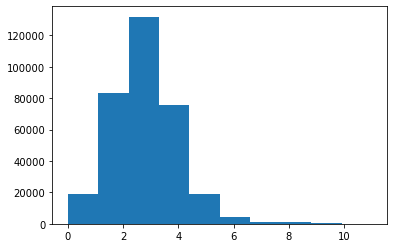

In [52]:
# plotting histograms of 3 numeric fields for questions2.txt

import matplotlib.pyplot as plt

#create histogram for bedroomcnt variable
plt.hist(full_dataset['bedroomcnt'], range=[0,11])


(array([5.92300e+04, 1.42333e+05, 1.04081e+05, 1.84920e+04, 7.33200e+03,
        2.89900e+03, 5.94000e+02, 4.51000e+02, 1.17000e+02, 5.60000e+01]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

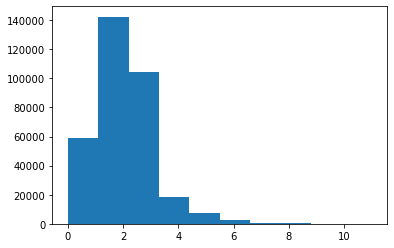

In [53]:
#create histogram for bathroom variable
plt.hist(full_dataset['bathroomcnt'], range=[0,11])


(array([1.58260e+05, 1.45829e+05, 2.42050e+04, 4.14300e+03, 1.04900e+03,
        3.57000e+02, 1.32000e+02, 5.20000e+01, 2.30000e+01, 1.00000e+01]),
 array([    0.,  1500.,  3000.,  4500.,  6000.,  7500.,  9000., 10500.,
        12000., 13500., 15000.]),
 <BarContainer object of 10 artists>)

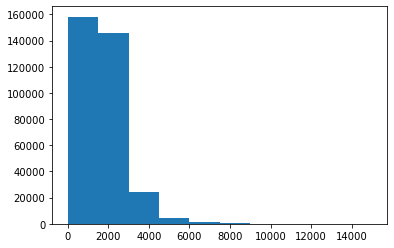

In [56]:
#create histogram for bedroomcnt variable
plt.hist(full_dataset['calculatedfinishedsquarefeet'], range=[0,15000])
